# Statystyczna analiza danych

In [1512]:
# @title
from IPython.display import display, HTML

pretty_header = """
<div style="
    margin-top: 40px;
    padding: 20px 10px;
    text-align: center;
    font-family: 'Segoe UI', sans-serif;
    color: #2c3e50;
">

    <h1 style="
        font-size: 28px;
        margin-bottom: 10px;
        background: linear-gradient(90deg, #1d70b8, #00a8e8);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        font-weight: 700;
    ">
        Statystyczna Analiza Danych
    </h1>

    <h2 style="
        font-size: 20px;
        font-weight: 400;
        margin-top: 0;
        color: #555;
    ">
        Kierunek: Sztuczna Inteligencja i Automatyzacja Procesów Biznesowych w ujęciu technicznym
    </h2>

    <p style="
        font-size: 16px;
        margin-top: 15px;
    ">
        Projekt słuchaczy studiów podyplomowych
    </p>

    <p style="
        font-size: 16px;
        font-style: italic;
        margin-bottom: 0;
    ">
        Autorzy (kolejność alfabetyczna):
    </p>
    <p style="font-size: 16px; font-weight: 500;">
        Kinga Kaza, Krzysztof Lachs, Joanna Mackiewicz
    </p>
</div>
"""

display(HTML(pretty_header))


<h1 style="text-align: center;">📚 Spis Treści</h1>

<div style="display: flex; justify-content: center;">
  <div style="text-align: left; background-color: #f9f9f9; padding: 20px 30px; border-radius: 10px; border: 1px solid #ddd; width: fit-content; font-size: 16px; line-height: 1.8;">

<ol>
  <li><a href="#wprowadzenie">Wprowadzenie</a></li>
  <li><a href="#import-bibliotek-i-danych">Import bibliotek i danych</a></li>
  <li><a href="#diagnostyka-danych">Diagnostyka danych</a></li>
  <li><a href="#przygotowanie-danych">Przygotowanie danych</a></li>
  <li><a href="#sprawdzanie-brakujacych-wartosci">Sprawdzanie brakujacych wartosci</a></li>
  <li><a href="#sprawdzanie-brakujacych-wartosci">Sprawdzanie brakujacych wartosci</a></li>
  <li><a href="#wnioski">Wnioski</a></li>
  <li><a href="#dalsze-kroki">Dalsze kroki</a></li>
</ol>

  </div>
</div>

<p style="text-align: center; font-size: 14px; color: gray;">⬆️ Kliknij linki, aby przejść do wybranej sekcji</p>


## Wprowadzenie



> **Temat projektu:**
> Analiza zbioru danych dotyczących poziomu szczęścia na świecie z wykorzystaniem raportu **World Happiness Report**, dostępnego na platformie [Kaggle](https://www.kaggle.com).

<p align="center">
  <img src="world_happiness_report.png" width="450"/>
</p>


---
<div align="center">


 **🧾 Opis zbioru danych**

Zbiór danych zawiera informacje o poziomie szczęścia w różnych krajach oraz o czynnikach, które mogą na nie wpływać, takich jak:

💰 **PKB na mieszkańca**  
🤝 **Wsparcie społeczne**  
🧬 **Oczekiwana długość życia w zdrowiu**  
🕊️ **Poczucie wolności w podejmowaniu decyzji życiowych**  
🎁 **Hojność**  
🧑‍⚖️ **Postrzeganie korupcji**

Raport opiera się na danych z **Gallup World Poll** i na tzw. *drabinie Cantrila*, w której respondenci oceniają swoje życie w skali od 0 do 10:

`0` → najgorsze możliwe życie  
`10` → najlepsze możliwe życie

---

**🧪 Metodologia raportu**

Wartości te są porównywane z fikcyjnym krajem **Dystopia**, który reprezentuje najniższe możliwe wyniki w każdej kategorii. Służy on jako punkt odniesienia i nie wpływa bezpośrednio na ocenę danego kraju.

---

**🎯 Cele analizy**
W ramach projektu przeprowadzimy:

📊 **Analizę statystyczną**
📈 **Wizualizacje danych**
🌐 **Porównania regionalne (polityczne, gospodarcze, kulturowe)**

Szczególną uwagę poświęcimy wpływowi **pandemii COVID-19** na poziom szczęścia na świecie.

---

**⚙️ Przygotowanie środowiska**

Na początku:

Zainstalowaliśmy bibliotekę **`kagglehub`** – do pobierania danych z Kaggle.  
Wykorzystaliśmy także znane z wykładów biblioteki do analizy danych i wizualizacji w Pythonie:
    `pandas`, `numpy`  
    `matplotlib`, `seaborn`  
    `plotly`, `missingno`

---

> 🔎 Celem tego projektu jest **lepsze zrozumienie czynników wpływających na dobrostan ludzi na całym świecie**, przy pomocy danych i metod analizy statystycznej.

---

**Ramka techniczna: Szczegółowe informacje o predyktorach uwzględnionych w naszej analizie**

<p>PKB per capita(PPP, stałe dolary z 2017 r.) pochodzi z bazy WDI Banku Światowego (16.12.2021). Dane za 2021 r. uzupełniono prognozami OECD lub Banku Światowego, skorygowanymi o przyrost ludności. W analizie zastosowano logarytm PKB per capita.</p>
<p>Oczekiwana długość życia w zdrowiu została oszacowana na podstawie danych WHO dla lat 2000, 2010, 2015, 2019, z zastosowaniem interpolacji i ekstrapolacji.</p>
<p>Wsparcie społeczne: średnia odpowiedzi (0/1) na pytanie GWP o możliwość uzyskania pomocy od bliskich w razie potrzeby.
<p>Swoboda wyboru średnia odpowiedzi (0/1) na pytanie GWP o zadowolenie z możliwości decydowania o własnym życiu.</p>
<p>Hojność: reszta regresji odpowiedzi na pytanie o darowiznę w ostatnim miesiącu na log PKB per capita.</p>
<p>Postrzeganie korupcji: średnia odpowiedzi (0/1) na pytania o korupcję w rządzie i biznesie. Przy braku danych rządowych – wykorzystano dane dot. biznesu.

**W surowych danych World Happiness Report znajdowały się kolumny oznaczone jako „explained by:”, np.:**

Explained by: GDP per capita

Explained by: Social support

Explained by: Healthy life expectancy

Explained by: Freedom to make life choices

Explained by: Generosity

Explained by: Perceptions of corruption

Dystopia + residual

Co oznaczają te dane?
Kolumny „explained by” przedstawiają statystyczną dekompozycję ogólnego wyniku szczęścia (Happiness Score) – czyli wskazują, jak dużą część tego wyniku można przypisać konkretnym czynnikom w modelu regresji liniowej użytym przez autorów raportu. Te wartości nie są bezpośrednio mierzone ani deklarowane przez respondentów – są one wynikiem modelowania statystycznego i mogą różnić się w zależności od przyjętych założeń lub metod regresji.
Dlaczego nie wykorzystaliśmy tych danych w naszej analizie?
Redundancja informacji:
Te kolumny stanowią przekształcenie już dostępnych danych (np. GDP per capita, Social support itd.) i nie wnoszą nowych zmiennych – tylko wskazują, w jakim stopniu dana cecha tłumaczy wynik Happiness Score.

Brak niezależności:
Wartości „explained by” są współzależne – suma wszystkich składników + „Dystopia + residual” ≈ Happiness Score. Uwzględnienie ich w analizie prowadziłoby do błędnego wniosku o niezależności tych zmiennych.

Zmienność metodologiczna:
Metody obliczania wkładów „explained by” mogą różnić się pomiędzy edycjami raportu – co utrudnia porównania między latami i może prowadzić do niejednoznacznych interpretacji.

Brak pełnej transparentności modeli:
Dokładne założenia statystyczne leżące u podstaw tych składników nie są w pełni udostępnione – dlatego trudno je interpretować bez znajomości wewnętrznej metodologii zespołu WHR.

Wniosek:
Zamiast używać pochodnych wartości „explained by”, w naszej analizie skupiliśmy się na rzeczywistych wskaźnikach społeczno-gospodarczych (np. surowych danych GDP per capita, Social support, Generosity itp.), ponieważ:

są bardziej przejrzyste i bezpośrednie,

umożliwiają porównania między latami i regionami,

nadają się do analizy korelacji, PCA i standaryzacji.




</p>





</div>

analizujemy Happiness Score jako zmienną główną.


## Opis kolumn

In [1513]:
from IPython.display import display, HTML

tech_box_html = """
<div style='
    background-color: #f9f9f9;
    border-left: 6px solid #007acc;
    padding: 20px;
    margin-top: 20px;
    font-family: "Segoe UI", sans-serif;
    font-size: 15px;
    line-height: 1.6;
    color: #333333;
'>
  <strong style='font-size: 18px;'>📦 Ramka techniczna: Szczegółowe informacje o predyktorach uwzględnionych w naszej analizie </strong><br><br>
  <ol>
    <li><strong>PKB per capita</strong> (PPP, stałe dolary z 2017 r.) pochodzi z bazy WDI Banku Światowego (16.12.2021). Dane za 2021 r. uzupełniono prognozami OECD lub Banku Światowego, skorygowanymi o przyrost ludności. W analizie zastosowano logarytm PKB per capita.</li>
    <li><strong>Oczekiwana długość życia w zdrowiu</strong> została oszacowana na podstawie danych WHO dla lat 2000, 2010, 2015, 2019, z zastosowaniem interpolacji i ekstrapolacji.</li>
    <li><strong>Wsparcie społeczne</strong>: średnia odpowiedzi (0/1) na pytanie GWP o możliwość uzyskania pomocy od bliskich w razie potrzeby.</li>
    <li><strong>Swoboda wyboru</strong>: średnia odpowiedzi (0/1) na pytanie GWP o zadowolenie z możliwości decydowania o własnym życiu.</li>
    <li><strong>Hojność</strong>: reszta regresji odpowiedzi na pytanie o darowiznę w ostatnim miesiącu na log PKB per capita.</li>
    <li><strong>Postrzeganie korupcji</strong>: średnia odpowiedzi (0/1) na pytania o korupcję w rządzie i biznesie. Przy braku danych rządowych – wykorzystano dane dot. biznesu.</li>
  </ol>
</div>
"""

display(HTML(tech_box_html))



In [1514]:
#import wszystkich potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import kagglehub
import plotly.express as px
from matplotlib.ticker import MaxNLocator
from scipy.stats.mstats import winsorize



# Zaimportowanie ramek danych z Kaggle
path = kagglehub.dataset_download("mathurinache/world-happiness-report")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-happiness-report


In [1515]:
years = range(2015, 2023)
dfs = {}

for year in years:
    dfs[year] = pd.read_csv(f"{path}/{year}.csv")

W następnym punkcie przeanalizujemy zbiór danych w celu wybrana danych przydatnych do analizy interesujących nas problemów oraz ujednolicenia tych danych.
Dokonamy również czyszczenia i identyfikacji braków danych.   

Koniecznosc operacji masowach, poniewaz mamy wiele ramek danych. Dlatego wiele operacji bedzie wykonywanych w petlach

## Czyszczenie i porządkowanie danych

### Przejrzymy nazwy kolumn

In [1516]:
from IPython.display import display, HTML

summary_data = []

# Iteracja po słowniku dfs: kluczem jest rok, wartością DataFrame
for year, df in dfs.items():
    if isinstance(df, pd.DataFrame):
        summary_data.append({
            "Rok": year,
            "Liczba kolumn": len(df.columns),
            "Nazwy kolumn": ", ".join(df.columns.tolist())
        })
    else:
        summary_data.append({
            "Rok": year,
            "Liczba kolumn": "N/A (Not a DataFrame)",
            "Nazwy kolumn": "N/A"
        })

# Tworzenie DataFrame z podsumowaniem
summary_df_str = pd.DataFrame(summary_data)

# Stylowanie tabeli dla lepszej czytelności
styles = [
    dict(selector="th", props=[("text-align", "left")]),
    dict(selector="td", props=[("text-align", "left")]),
    dict(selector="td:nth-child(3)", props=[("min-width", "100px")])
]

# Wyświetlenie stylizowanej tabeli
display(summary_df_str.style.set_table_styles(styles))


,Rok,Liczba kolumn,Nazwy kolumn
0,2015,12,"Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
1,2016,13,"Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
2,2017,12,"Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual"
3,2018,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
4,2019,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
5,2020,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
6,2021,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
7,2022,12,"RANK, Country, Happiness score, Whisker-high, Whisker-low, Dystopia (1.83) + residual, Explained by: GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption"


Wiele kolumn ma:

- identyczne znaczenie, ale różne nazwy (np. "Happiness Score" vs "Score" vs "Ladder score")

- różne formaty (np. "Trust..Government.Corruption." vs "Perceptions of corruption")

- różne style: CamelCase, snake_case, dot.notation

Można również zauważyc, że dane nie są jednolite. w zależności od roku df posiada od 9 do 20 kolumn

## Sprawdźmy brakujące wartości

Mozemy sobie albo to zwizualizowac:

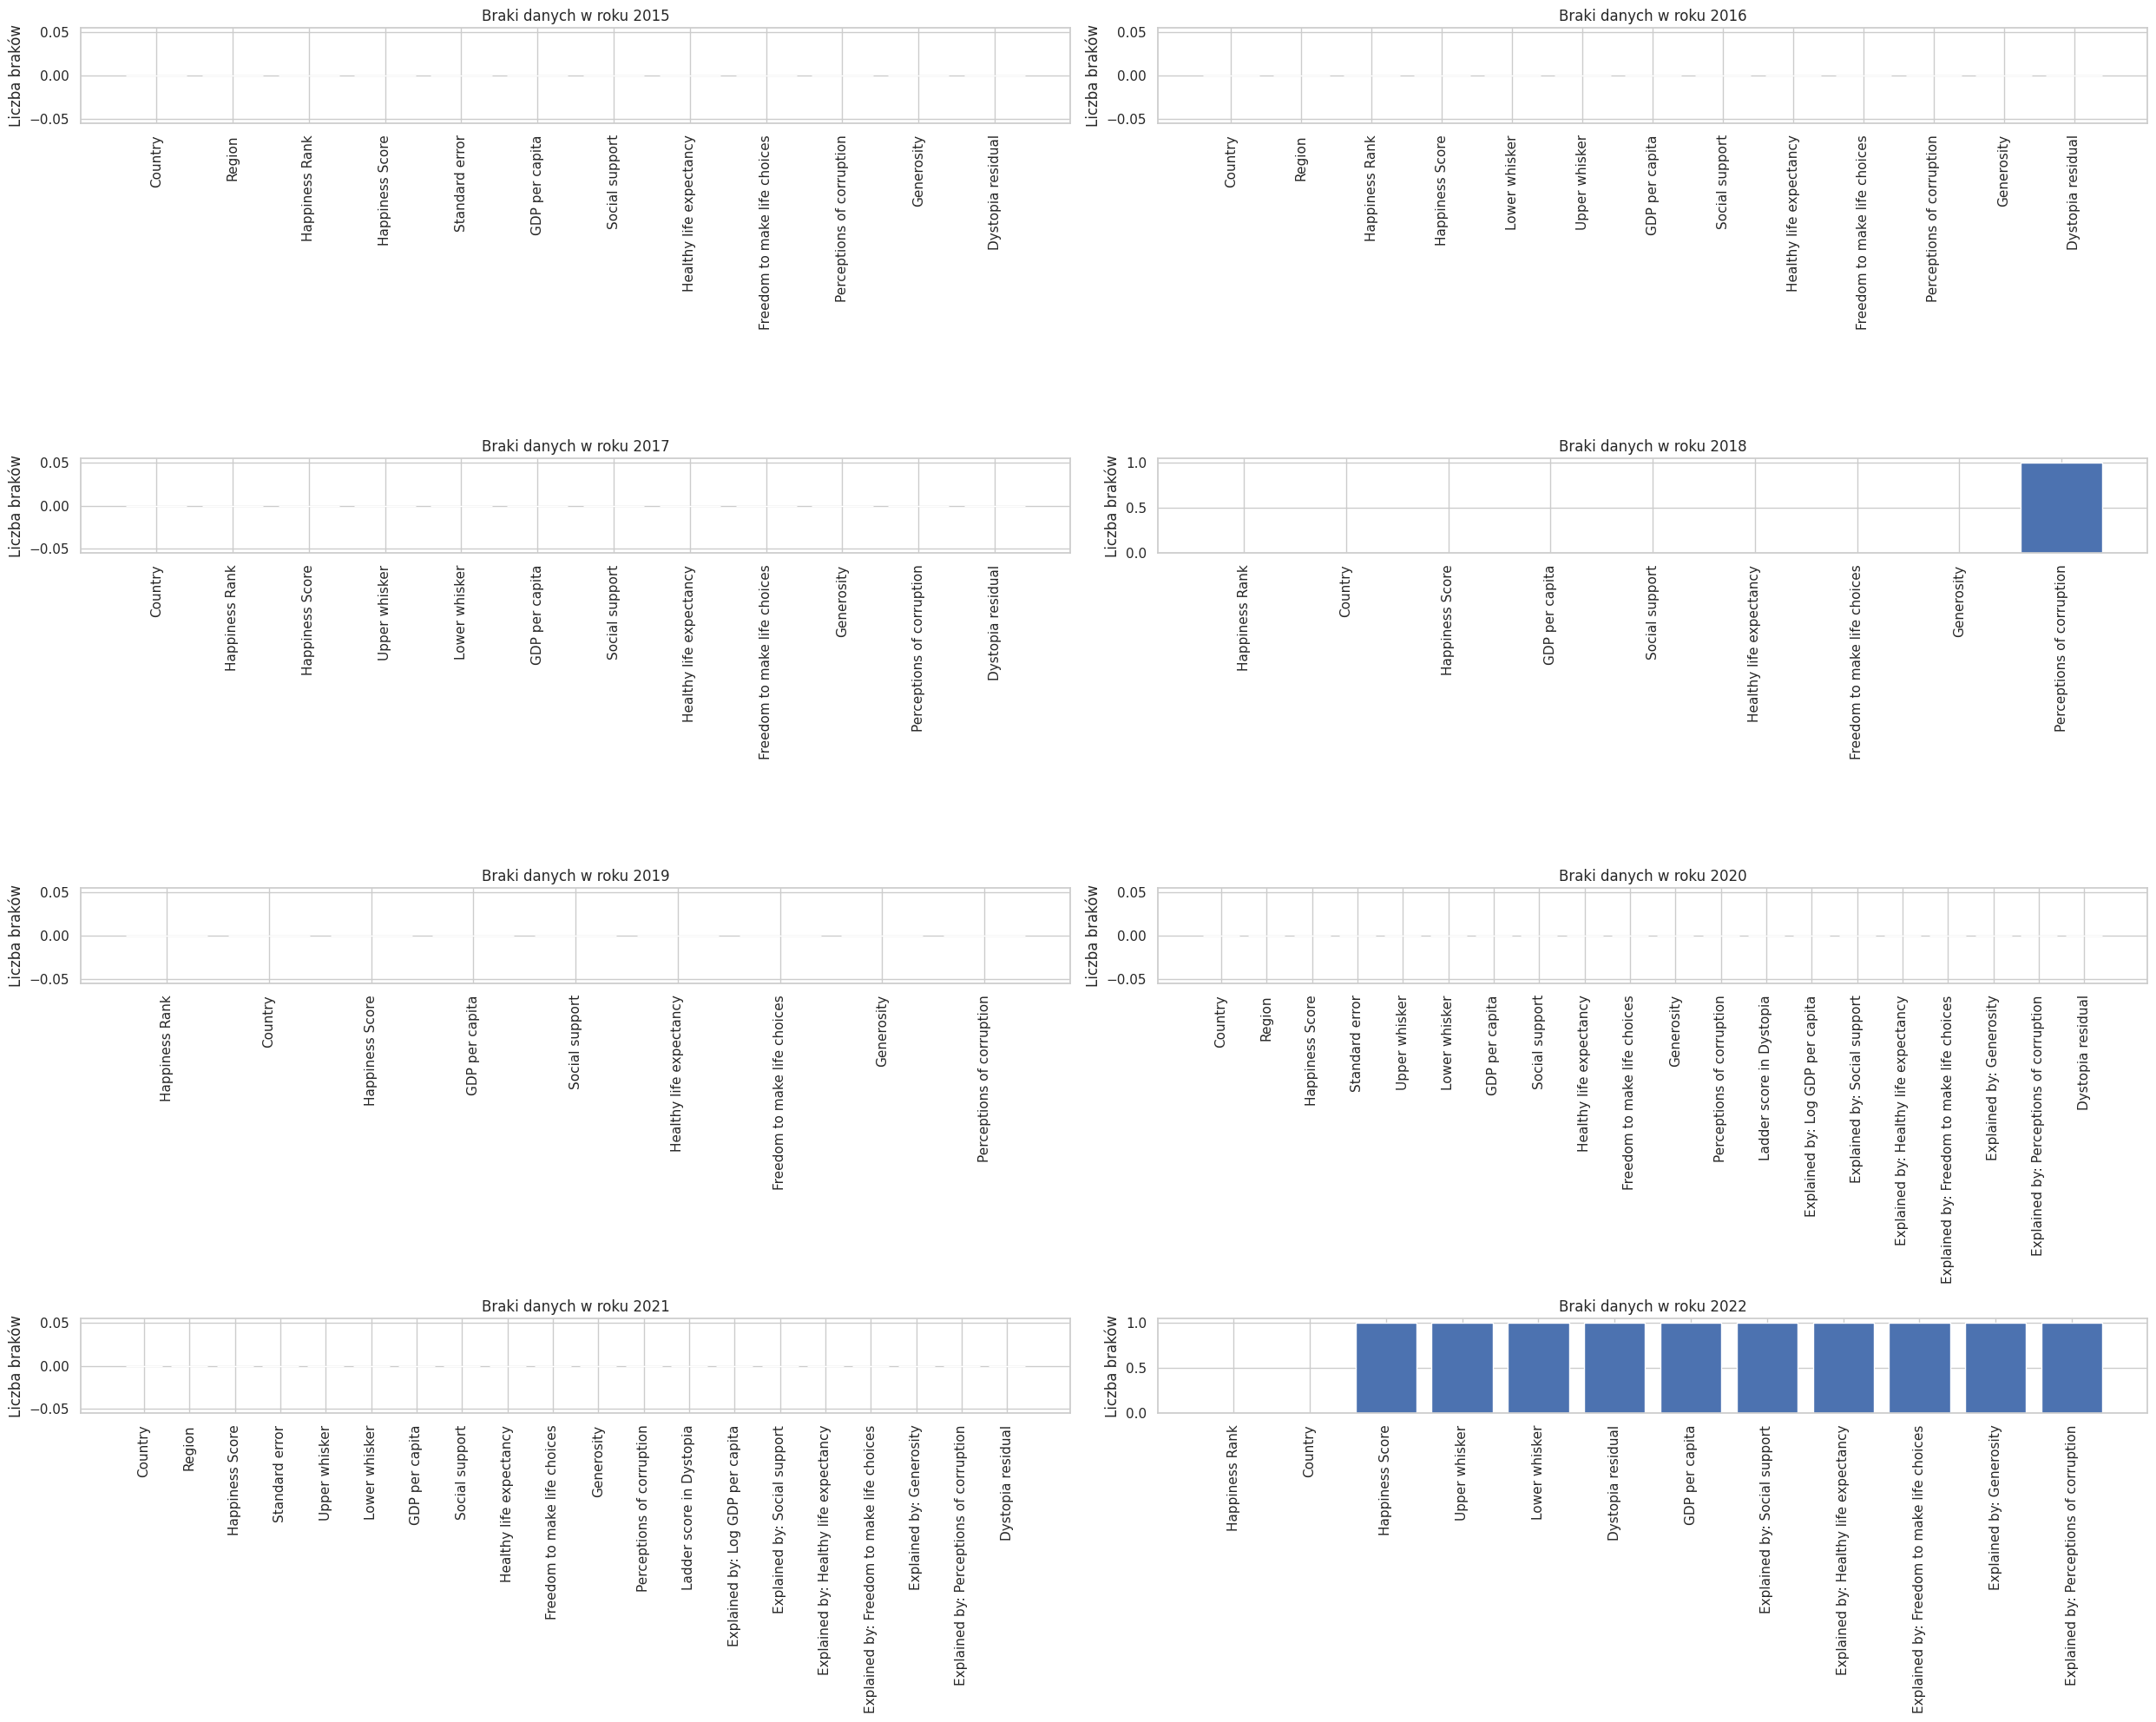

In [1517]:
mapa_kolumn = {
    # Kraje i regiony
    'Country or region': 'Country',
    'Country name': 'Country',
    'Regional indicator': 'Region',

    # Rankingi i oceny
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank',
    'RANK': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',

    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Ladder score': 'Happiness Score',

    # Gospodarka
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Explained by: GDP per capita': 'GDP per capita',
    'Log GDP per capita': 'GDP per capita',

    # Rodzina / wsparcie społeczne
    'Family': 'Social support',
    'Social support': 'Social support',

    # Życie i zdrowie
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',

    # Wolność
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',

    # Korupcja / zaufanie
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',

    # Dystopia
    'Dystopia + residual': 'Dystopia residual',
    'Dystopia.Residual': 'Dystopia residual',
    'Dystopia (1.83) + residual': 'Dystopia residual',
    'Dystopia Residual': 'Dystopia residual',

    # Błędy i przedziały ufności
    'Standard Error': 'Standard error',
    'Standard error of ladder score': 'Standard error',
    'Lower Confidence Interval': 'Lower whisker',
    'Whisker-low': 'Lower whisker',
    'Whisker.low': 'Lower whisker',
    'lowerwhisker': 'Lower whisker',

    'Upper Confidence Interval': 'Upper whisker',
    'Whisker-high': 'Upper whisker',
    'Whisker.high': 'Upper whisker',
    'upperwhisker': 'Upper whisker'
}




# Tworzenie subplotów
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()

# Iteracja po posortowanych latach
for i, year in enumerate(sorted(dfs.keys())):
    df = dfs[year].rename(columns=mapa_kolumn)  # Ujednolicenie nazw kolumn
    null_counts = df.isnull().sum()

    axes[i].bar(null_counts.index, null_counts.values)
    axes[i].set_title(f'Braki danych w roku {year}')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel("Liczba braków")

plt.tight_layout()
plt.show()



### Albo opisac, z wyszczegolnieniem indeksow, gdzie brakuje wartosci

In [1518]:
# Sprawdzanie brakujących wartości w każdym z DataFrame'ów
for name, df in dfs.items():
    # Oblicz sumę brakujących wartości dla każdej kolumny
    missing_values = df.isnull().sum()

    # Sprawdź, czy w ogóle istnieją jakieś brakujące wartości
    if missing_values.any():
        print(f"\nDataFrame '{name}' ma brakujące wartości w kolumnach:")
        # Wyświetl tylko te kolumny, w których brakuje danych
        print(missing_values[missing_values > 0])

        # Wyświetl indeksy brakujących wartości dla każdej takiej kolumny
        for col in missing_values[missing_values > 0].index:
            missing_indices = df[df[col].isnull()].index.tolist()
            print(f" → Kolumna '{col}': brakujące wartości w indeksach: {missing_indices}")

        print("-" * 60)  # Separator dla lepszej czytelności
    else:
        print(f"{name} nie ma brakujących wartości.")

print("\n--- Zakończono sprawdzanie brakujących wartości ---")

2015 nie ma brakujących wartości.
2016 nie ma brakujących wartości.
2017 nie ma brakujących wartości.

DataFrame '2018' ma brakujące wartości w kolumnach:
Perceptions of corruption    1
dtype: int64
 → Kolumna 'Perceptions of corruption': brakujące wartości w indeksach: [19]
------------------------------------------------------------
2019 nie ma brakujących wartości.
2020 nie ma brakujących wartości.
2021 nie ma brakujących wartości.

DataFrame '2022' ma brakujące wartości w kolumnach:
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64
 → Kolumna 'Hap

Zagladamy do ramki 2018. Tu brakuje danych o perception of corruption.

1. Średnia dla regionu	Użyj średniej Corruption dla krajów z tego samego regionu (np. Middle East and North Africa)	✅ Kontekst lokalny, 🟡 uśrednione
2. Średnia dla UAE z innych lat	Jeśli UAE występuje w innych latach, użyj ich średniej	✅ Wiarygodne, 🟡 tylko jeśli dane dostępne
3. Model regresji	Oszacuj wartość na podstawie innych zmiennych (GDP, Score, Support itd.)	✅ Dokładne, 🟡 bardziej złożone


Do tej brakujacej wartosci wrocimy po czyszczeniu danych

In [1519]:
dfs[2018].head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


Zaglądamy do ramki z 2022 roku. Widzimy, ze w indeksie 146 jest pusta linijka, którą można po prostu usunąć

In [1520]:
dfs[2022]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


In [1521]:
# Usuwanie linijki z indeksu 146

dfs[2022].drop(index=146, inplace=True)


## Ujednolicenia nazw kolumn

In [1522]:
# Krok 1: Zbieramy wszystkie unikalne nazwy kolumn z każdego DataFrame
all_columns = set()
for df in dfs.values():
    all_columns.update(df.columns)

# Przekształcamy na posortowaną listę dla przejrzystości
sorted_all_columns = sorted(all_columns)
sorted_all_columns



['Country',
 'Country name',
 'Country or region',
 'Dystopia (1.83) + residual',
 'Dystopia + residual',
 'Dystopia Residual',
 'Dystopia.Residual',
 'Economy (GDP per Capita)',
 'Economy..GDP.per.Capita.',
 'Explained by: Freedom to make life choices',
 'Explained by: GDP per capita',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'Family',
 'Freedom',
 'Freedom to make life choices',
 'GDP per capita',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Happiness score',
 'Happiness.Rank',
 'Happiness.Score',
 'Health (Life Expectancy)',
 'Health..Life.Expectancy.',
 'Healthy life expectancy',
 'Ladder score',
 'Ladder score in Dystopia',
 'Logged GDP per capita',
 'Lower Confidence Interval',
 'Overall rank',
 'Perceptions of corruption',
 'RANK',
 'Region',
 'Regional indicator',
 'Score',
 'Social support',
 'Standard Error',
 'Standard er

In [1523]:
# Krok 2: Mapa ujednoliconych nazw kolumn
mapa_kolumn = {
    # Kraje i regiony
    'Country or region': 'Country',
    'Country name': 'Country',
    'Regional indicator': 'Region',

    # Rankingi i oceny
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank',
    'RANK': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',

    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Ladder score': 'Happiness Score',

    # Gospodarka
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Explained by: GDP per capita': 'GDP per capita',
    'Log GDP per capita': 'GDP per capita',

    # Rodzina / wsparcie społeczne
    'Family': 'Social support',
    'Social support': 'Social support',

    # Życie i zdrowie
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',

    # Wolność
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',

    # Korupcja / zaufanie
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',

    # Dystopia
    'Dystopia + residual': 'Dystopia residual',
    'Dystopia.Residual': 'Dystopia residual',
    'Dystopia (1.83) + residual': 'Dystopia residual',
    'Dystopia Residual': 'Dystopia residual',

    # Błędy i przedziały ufności
    'Standard Error': 'Standard error',
    'Standard error of ladder score': 'Standard error',
    'Lower Confidence Interval': 'Lower whisker',
    'Whisker-low': 'Lower whisker',
    'Whisker.low': 'Lower whisker',
    'lowerwhisker': 'Lower whisker',

    'Upper Confidence Interval': 'Upper whisker',
    'Whisker-high': 'Upper whisker',
    'Whisker.high': 'Upper whisker',
    'upperwhisker': 'Upper whisker'
}




In [1524]:
dfs[2015]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [1525]:
# Krok 3: Zastosowanie mapy nazw kolumn do wszystkich ramek danych
for year, df in dfs.items():
    # Zmieniamy tylko te kolumny, które są w mapie
    renamed_cols = {col: mapa_kolumn[col] for col in df.columns if col in mapa_kolumn}
    dfs[year] = df.rename(columns=renamed_cols)

# Sprawdzenie: które standardowe kolumny są dostępne w każdym roku
column_presence = {
    year: sorted([col for col in df.columns if col in mapa_kolumn.values()])
    for year, df in dfs.items()
}

column_presence


{2015: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Standard error'],
 2016: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Upper whisker'],
 2017: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Social support',
  'Upper whisker'],
 2018: ['Country',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Social support'],
 2019: ['Country',
  'Freedom t

In [1526]:
dfs[2020]

,Country,Region,Happiness Score,Standard error,Upper whisker,Lower whisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [1527]:
# Przetwarzanie każdej ramki w słowniku dfs
for rok, df in dfs.items():
    # 1. Zastosowanie mapy kolumn (ujednolicenie nazw)
    nowe_nazwy = {col: mapa_kolumn[col] for col in df.columns if col in mapa_kolumn}
    df = df.rename(columns=nowe_nazwy)

    # 2. Usunięcie zduplikowanych kolumn (jeśli występują)
    df = df.loc[:, ~df.columns.duplicated()]

    # 3. Usunięcie istniejącej kolumny 'Year', jeśli już jest
    if 'Year' in df.columns:
        df = df.drop(columns='Year')

    # 4. Dodanie kolumny 'Year' na pierwszą pozycję
    df.insert(0, 'Year', rok)

    # 5. Aktualizacja ramki danych w słowniku
    dfs[rok] = df


In [1528]:
# Dodajemy kolumne Happiness Rank, jesli jej brakuje
for rok, df in dfs.items():
    if 'Happiness Score' in df.columns:
        # Obliczenie rankingu na podstawie Happines Score
        df['Happiness Rank'] = df['Happiness Score'].rank(ascending=False, method='min')

        # Wstaw kolumnę przed 'Happiness Score'
        kolumny = df.columns.tolist()
        kolumny.remove('Happiness Rank')
        index_score = kolumny.index('Happiness Score')
        kolumny.insert(index_score, 'Happiness Rank')
        df = df[kolumny]

        dfs[rok] = df

# Sprawdzenie dla roku 2016
dfs[2016]


,Year,Country,Region,Happiness Rank,Happiness Score,Lower whisker,Upper whisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia residual
0,2016,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2016,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,2016,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,2016,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2016,Benin,Sub-Saharan Africa,153.0,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,2016,Afghanistan,Southern Asia,154.0,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,2016,Togo,Sub-Saharan Africa,155.0,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,2016,Syria,Middle East and Northern Africa,156.0,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


# Ujednolicenie nazw krajów

In [1529]:
# Krok 1: Zbieramy unikalne nazwy krajów z każdej ramki danych
kraje_na_rok = {
    rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items() if "Country" in df.columns
}

# Krok 2: Zbiór wszystkich unikalnych nazw krajów
wszystkie_kraje = sorted(set.union(*kraje_na_rok.values()))

# Krok 3: Macierz obecności krajów w poszczególnych latach
macierz_spojnosci_krajow = pd.DataFrame({
    rok: [kraj in kraje for kraj in wszystkie_kraje] for rok, kraje in kraje_na_rok.items()
}, index=wszystkie_kraje)

# Krok 4: Wybierz kraje, które nie występują we wszystkich 8 latach
niespojne_kraje_df = macierz_spojnosci_krajow[macierz_spojnosci_krajow.sum(axis=1) < len(dfs)]


In [1530]:
# Krok 1: Usuń gwiazdki z nazw krajów we wszystkich ramkach danych
for rok, df in dfs.items():
    if "Country" in df.columns:
        df["Country"] = df["Country"].str.replace("*", "", regex=False).str.strip()
        dfs[rok] = df

# Krok 2: Zbierz wszystkie unikalne kraje ze wszystkich lat (po usunięciu gwiazdek)
wszystkie_kraje = set()
for df in dfs.values():
    if "Country" in df.columns:
        wszystkie_kraje.update(df["Country"].dropna().unique())

# Posortowany zbiór unikalnych nazw krajów (do ręcznego mapowania)
wszystkie_kraje = sorted(wszystkie_kraje)

# Wyświetlenie jako DataFrame (np. do tworzenia mapy ujednolicającej)
kraje_df = pd.DataFrame({"Oryginalna nazwa": wszystkie_kraje})

In [1531]:
kraje_df

,Oryginalna nazwa
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
170,Venezuela
171,Vietnam
172,Yemen
173,Zambia


In [1532]:
# Mapowanie: ujednolicone oficjalne nazwy krajów
mapa_ujednolicenia_krajow = {
    # Congo warianty
    "Congo": "Republic of the Congo",  # zakładamy, że to Brazzaville
    "Congo (Brazzaville)": "Republic of the Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",


    # Hong Kong
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Hong Kong S.A.R., China": "Hong Kong",

    # Iran
    "Iran (Islamic Republic of)": "Iran",

    # Russia
    "Russia": "Russian Federation",

    # Palestine
    "Palestinian Territories": "Palestine",
    "Palestine": "Palestine",


    # Czech Republic
    "Czechia": "Czech Republic",

    # United States
    "United States": "United States of America",

    # Macedonia
    "North Macedonia": "Macedonia",

    # Taiwan
    "Taiwan Province of China": "Taiwan",

    # Trinidad i Tobago
    "Trinidad & Tobago": "Trinidad and Tobago",

    # Somalia
    "Somaliland region": "Somaliland",
    "Somaliland Region": "Somaliland"
}

# Zastosowanie ujednoliconego słownika do wszystkich ramek
for rok, df in dfs.items():
    if "Country" in df.columns:
        df["Country"] = df["Country"].replace(mapa_ujednolicenia_krajow)
        dfs[rok] = df

# Sprawdzenie na przykładzie 2021
dfs[2022].Country.unique()


array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand',
       'Austria', 'Australia', 'Ireland', 'Germany', 'Canada',
       'United States of America', 'United Kingdom', 'Czech Republic',
       'Belgium', 'France', 'Bahrain', 'Slovenia', 'Costa Rica',
       'United Arab Emirates', 'Saudi Arabia', 'Taiwan', 'Singapore',
       'Romania', 'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta',
       'Lithuania', 'Slovakia', 'Estonia', 'Panama', 'Brazil',
       'Guatemala', 'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile',
       'Nicaragua', 'Mexico', 'Croatia', 'Poland', 'El Salvador',
       'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan',
       'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea',
       'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyzstan',
       'Belarus', 'Colombia', 'Bosnia and Herzegovina', 'Mongolia',
       'Dominican Republic', 'Malaysia', 'Bolivia', 'Chi

In [1533]:
# Krok 1: Zbiór wszystkich krajów we wszystkich ramkach
zbiory_krajow = {rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items()}

# Krok 2: Kraje obecne we wszystkich latach (przecięcie)
kraje_we_wszystkich_latach = set.intersection(*zbiory_krajow.values())

# Krok 3: Lista krajów w jakimkolwiek roku (suma zbiorów)
wszystkie_kraje = set.union(*zbiory_krajow.values())

# Krok 4: Kraje nieobecne w co najmniej jednym roku
kraje_niekompletne = sorted(wszystkie_kraje - kraje_we_wszystkich_latach)

# Tabela krajów obecnych we wszystkich latach
df_kraje_wszystkie = pd.DataFrame(sorted(kraje_we_wszystkich_latach), columns=["Kraje obecne we wszystkich latach"])

# Tabela krajów niekompletnych
df_kraje_brakujace = pd.DataFrame(kraje_niekompletne, columns=["Kraje brakujące w co najmniej jednym roku"])



In [1534]:
df_kraje_wszystkie


,Kraje obecne we wszystkich latach
0,Afghanistan
1,Albania
2,Algeria
3,Argentina
4,Armenia
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


In [1535]:
# Stwórz ramkę, która pokazuje obecność każdego kraju w poszczególnych latach
kraje_unikalne = sorted(set.union(*[set(df["Country"].dropna().unique()) for df in dfs.values()]))

# Tworzymy macierz obecności (kraj x rok)
spojnosc_krajow_df = pd.DataFrame(index=kraje_unikalne, columns=dfs.keys())

# Wypełniamy True/False w zależności od obecności kraju w danym roku
for rok, df in dfs.items():
    obecne_kraje = set(df["Country"].dropna().unique())
    spojnosc_krajow_df[rok] = spojnosc_krajow_df.index.isin(obecne_kraje)

# Które kraje występują tylko w jednym roku
kraje_tylko_w_jednym_roku = spojnosc_krajow_df.sum(axis=1)
kraje_tylko_w_jednym_roku = kraje_tylko_w_jednym_roku[kraje_tylko_w_jednym_roku == 1].index.tolist()

# Przekształć do dłuższego formatu, aby wskazać brakujące kraje per rok
braki = spojnosc_krajow_df[~spojnosc_krajow_df].stack().reset_index()
braki.columns = ["Country", "Year", "Brakuje"]

kraje_tylko_w_jednym_roku


['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']

In [1536]:
spojnosc_krajow_df.loc[['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']]

,2015,2016,2017,2018,2019,2020,2021,2022
Djibouti,True,False,False,False,False,False,False,False
"Eswatini, Kingdom of",False,False,False,False,False,False,False,True
Oman,True,False,False,False,False,False,False,False
Puerto Rico,False,True,False,False,False,False,False,False


In [1537]:
# Na podstawie danych z df `spojnosc_krajow_df`, policz ile lat brakuje każdemu krajowi
liczba_brakow = spojnosc_krajow_df.apply(lambda row: (~row).sum(), axis=1)

# Kraje, które mają dokładnie 1 brakujący rok
kraje_z_1_brakiem = liczba_brakow[liczba_brakow == 1].index.tolist()

# W których konkretnie latach brakuje tych krajów
braki_dla_krajow_1 = braki[braki["Country"].isin(kraje_z_1_brakiem)].sort_values(by=["Country", "Year"])


In [1538]:
# Filtruj dane: tylko kraje, które występują we wszystkich latach
kraje_stale = spojnosc_krajow_df.index[spojnosc_krajow_df.all(axis=1)].tolist()

# Połącz listę krajów stałych (pełne dane) i tych z tylko jednym brakującym rokiem
kraje_do_analizy = sorted(set(kraje_stale).union(set(kraje_z_1_brakiem)))

# Stwórz ramkę z ostateczną listą krajów do analizy
df_kraje_do_analizy = pd.DataFrame(kraje_do_analizy, columns=["Kraje do analizy"])


In [1539]:
df_kraje_do_analizy

,Kraje do analizy
0,Afghanistan
1,Albania
2,Algeria
3,Argentina
4,Armenia
...,...
139,Venezuela
140,Vietnam
141,Yemen
142,Zambia


In [1540]:
# Filtrowanie danych z dfs tylko dla tych krajów
dfs_kraje_z_1_brakiem = {
    rok: df[df["Country"].isin(kraje_z_1_brakiem)].copy()
    for rok, df in dfs.items()
}

# Łączenie wszystkich lat w jeden DataFrame dla tych krajów
df_kraje_z_1_brakiem = pd.concat(dfs_kraje_z_1_brakiem.values(), ignore_index=True)


Posiadamy 144 kraje do naszej analizy

## Tworzenie jednej ramki danych dla wszystkich lat

In [1541]:
# Lista docelowych kolumn we właściwej kolejności
kolumny_docelowe_finalne = [
    "Year", "Country", "Happiness Rank", "Happiness Score",
    "GDP per capita", "Social support", "Healthy life expectancy",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption"
]

# Pryeniesienie danych z uwzględnieniem kolumn w odpowiedniej kolejności
finalne_dane = []
for rok, df in dfs.items():
    df_filtr = df[df["Country"].isin(kraje_do_analizy)].copy()
    df_filtr["Year"] = rok
    df_filtr = df_filtr[[col for col in kolumny_docelowe_finalne if col in df_filtr.columns]]
    finalne_dane.append(df_filtr)

# Concat i ustawienie kolejności kolumn
df_final = pd.concat(finalne_dane, ignore_index=True)
df_final = df_final[kolumny_docelowe_finalne]

In [1542]:
df_final

,Year,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2015,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,4.0,7.522,1.459,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...
1141,2022,Botswana,142.0,"3,471","1,503",NaN,NaN,NaN,NaN,NaN
1142,2022,Rwanda,143.0,"3,268","0,785",NaN,NaN,NaN,NaN,NaN
1143,2022,Zimbabwe,144.0,"2,995","0,947",NaN,NaN,NaN,NaN,NaN
1144,2022,Lebanon,145.0,"2,955","1,392",NaN,NaN,NaN,NaN,NaN


### Uzupelniamy regiony

In [1543]:
# Mapowanie regionów
region_map = dfs[2021][["Country", "Region"]].drop_duplicates()
region_map.columns = ["Country", "Region"]  # standaryzacja nazw kolumn


# Dodanie kolumnz 'Region' przez merge
df_final = pd.merge(df_final, region_map, on="Country", how="left")

# Umieszczanie kolumny 'Region' bezpośrednio po 'Country'
cols = df_final.columns.tolist()
cols.remove("Region")
insert_pos = cols.index("Country") + 1
cols.insert(insert_pos, "Region")
df_final = df_final[cols]


In [1544]:
# Lokaliyowanie wartości niebędące liczbami typu float w dwóch kluczowych kolumnach
problematic_cols = ["Happiness Score", "GDP per capita"]

# Znajdź niepoprawne wartości (np. zawierające przecinek)
for col in problematic_cols:
    print(f"\nNiepoprawne wartości w kolumnie '{col}':")
    print(df_final[df_final[col].apply(lambda x: isinstance(x, str) and "," in x)][[col]].head())

# Konwersja: zamiana kropek na przecinki i konwersja na float
for col in problematic_cols:
    df_final[col] = df_final[col].apply(
        lambda x: float(x.replace(",", ".")) if isinstance(x, str) and "," in x else x
    )


Niepoprawne wartości w kolumnie 'Happiness Score':
     Happiness Score
1004           7,821
1005           7,636
1006           7,557
1007           7,512
1008           7,415

Niepoprawne wartości w kolumnie 'GDP per capita':
     GDP per capita
1004          1,892
1005          1,953
1006          1,936
1007          2,026
1008          1,945


Poniewaz rok 2022 nie posiada cech, które opisaja indeks szczescia, nie bedziemy go brac w tym momencie pod uwage. Dlatego bedziemy analizowac wylacznie lata 2015 - 2021

In [1545]:
df_final_no2022 = df_final[df_final["Year"] != 2022].copy()

Wracamy teraz do naszego braku w Perceptions of corruption w Zjednoczonych Emiratach Arabskich.

In [1546]:
# Znalezienie wiersza z brakiem w "Perceptions of corruption"
mask_missing = (
    (df_final_no2022["Country"] == "United Arab Emirates") &
    (df_final_no2022["Year"] == 2018)
)

Dla jednej obserwacji wykonamy imputacje danej poprzez stosująć średnią z danego regionu.

In [1547]:
# Pobranie regionu dla brakującego wiersza
region_missing = df_final_no2022.loc[mask_missing, "Region"].values[0]

# Obliczenie średniej z regionu (bez braków)
regional_mean = df_final_no2022[
    (df_final_no2022["Region"] == region_missing) &
    (df_final_no2022["Perceptions of corruption"].notnull())
]["Perceptions of corruption"].mean()

# Zaokrąglenie do 5 miejsc po przecinku
regional_mean = round(regional_mean, 5)

# Imputacja
df_final_no2022.loc[mask_missing, "Perceptions of corruption"] = regional_mean

# Sprawdzenie, czy brak został uzupełniony
missing_after = df_final_no2022["Perceptions of corruption"].isnull().sum()

In [1548]:
df_final_no2022.loc[df_final_no2022["Country"] == "United Arab Emirates"]

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,2015,United Arab Emirates,Middle East and North Africa,20.0,6.9010,1.427270,1.125750,0.809250,0.641570,0.264280,0.385830
169,2016,United Arab Emirates,Middle East and North Africa,28.0,6.5730,1.573520,0.871140,0.729930,0.562150,0.265910,0.355610
305,2017,United Arab Emirates,Middle East and North Africa,21.0,6.6480,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490
447,2018,United Arab Emirates,Middle East and North Africa,20.0,6.7740,2.096000,0.776000,0.670000,0.284000,0.186000,0.311390
592,2019,United Arab Emirates,Middle East and North Africa,21.0,6.8250,1.503000,1.310000,0.825000,0.598000,0.262000,0.182000
736,2020,United Arab Emirates,Middle East and North Africa,21.0,6.7908,11.109999,0.849181,67.082787,0.941346,0.123451,0.594502
884,2021,United Arab Emirates,Middle East and North Africa,25.0,6.5610,11.085000,0.844000,67.333000,0.932000,0.074000,0.589000


In [1549]:
# Upraszczamy nazwe naszej finalnej ramki danych
df = df_final_no2022.copy()

In [1550]:
# Zapisz plik Excel w środowisku Colab
df.to_excel("df_final.xlsx", index=False)

# Udostępnij plik do pobrania
from google.colab import files
#files.download("df_final.xlsx")

## Wizualizacje

### Histogramy

In [1551]:
df.describe()


,Year,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2018.007968,76.103586,5.462415,3.362653,1.016399,19.090196,0.524237,0.147727,0.297044
std,2.000483,44.380181,1.105389,3.894827,0.303297,29.339900,0.217991,0.168196,0.303616
min,2015.000000,1.000000,2.523000,0.015300,0.000000,0.000000,0.000000,-0.300907,0.000000
25%,2016.000000,37.000000,4.630250,0.815042,0.813000,0.582855,0.373510,0.058307,0.066682
50%,2018.000000,76.000000,5.431000,1.184020,0.952243,0.790780,0.505683,0.153000,0.135364
75%,2020.000000,114.000000,6.266650,7.844928,1.257588,56.097485,0.671428,0.247251,0.533227
max,2021.000000,158.000000,7.842000,11.647000,1.644000,76.953000,0.974998,0.838075,0.939000


In [1552]:
# Lista cech do analizy
cechy = [
    "Happiness Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

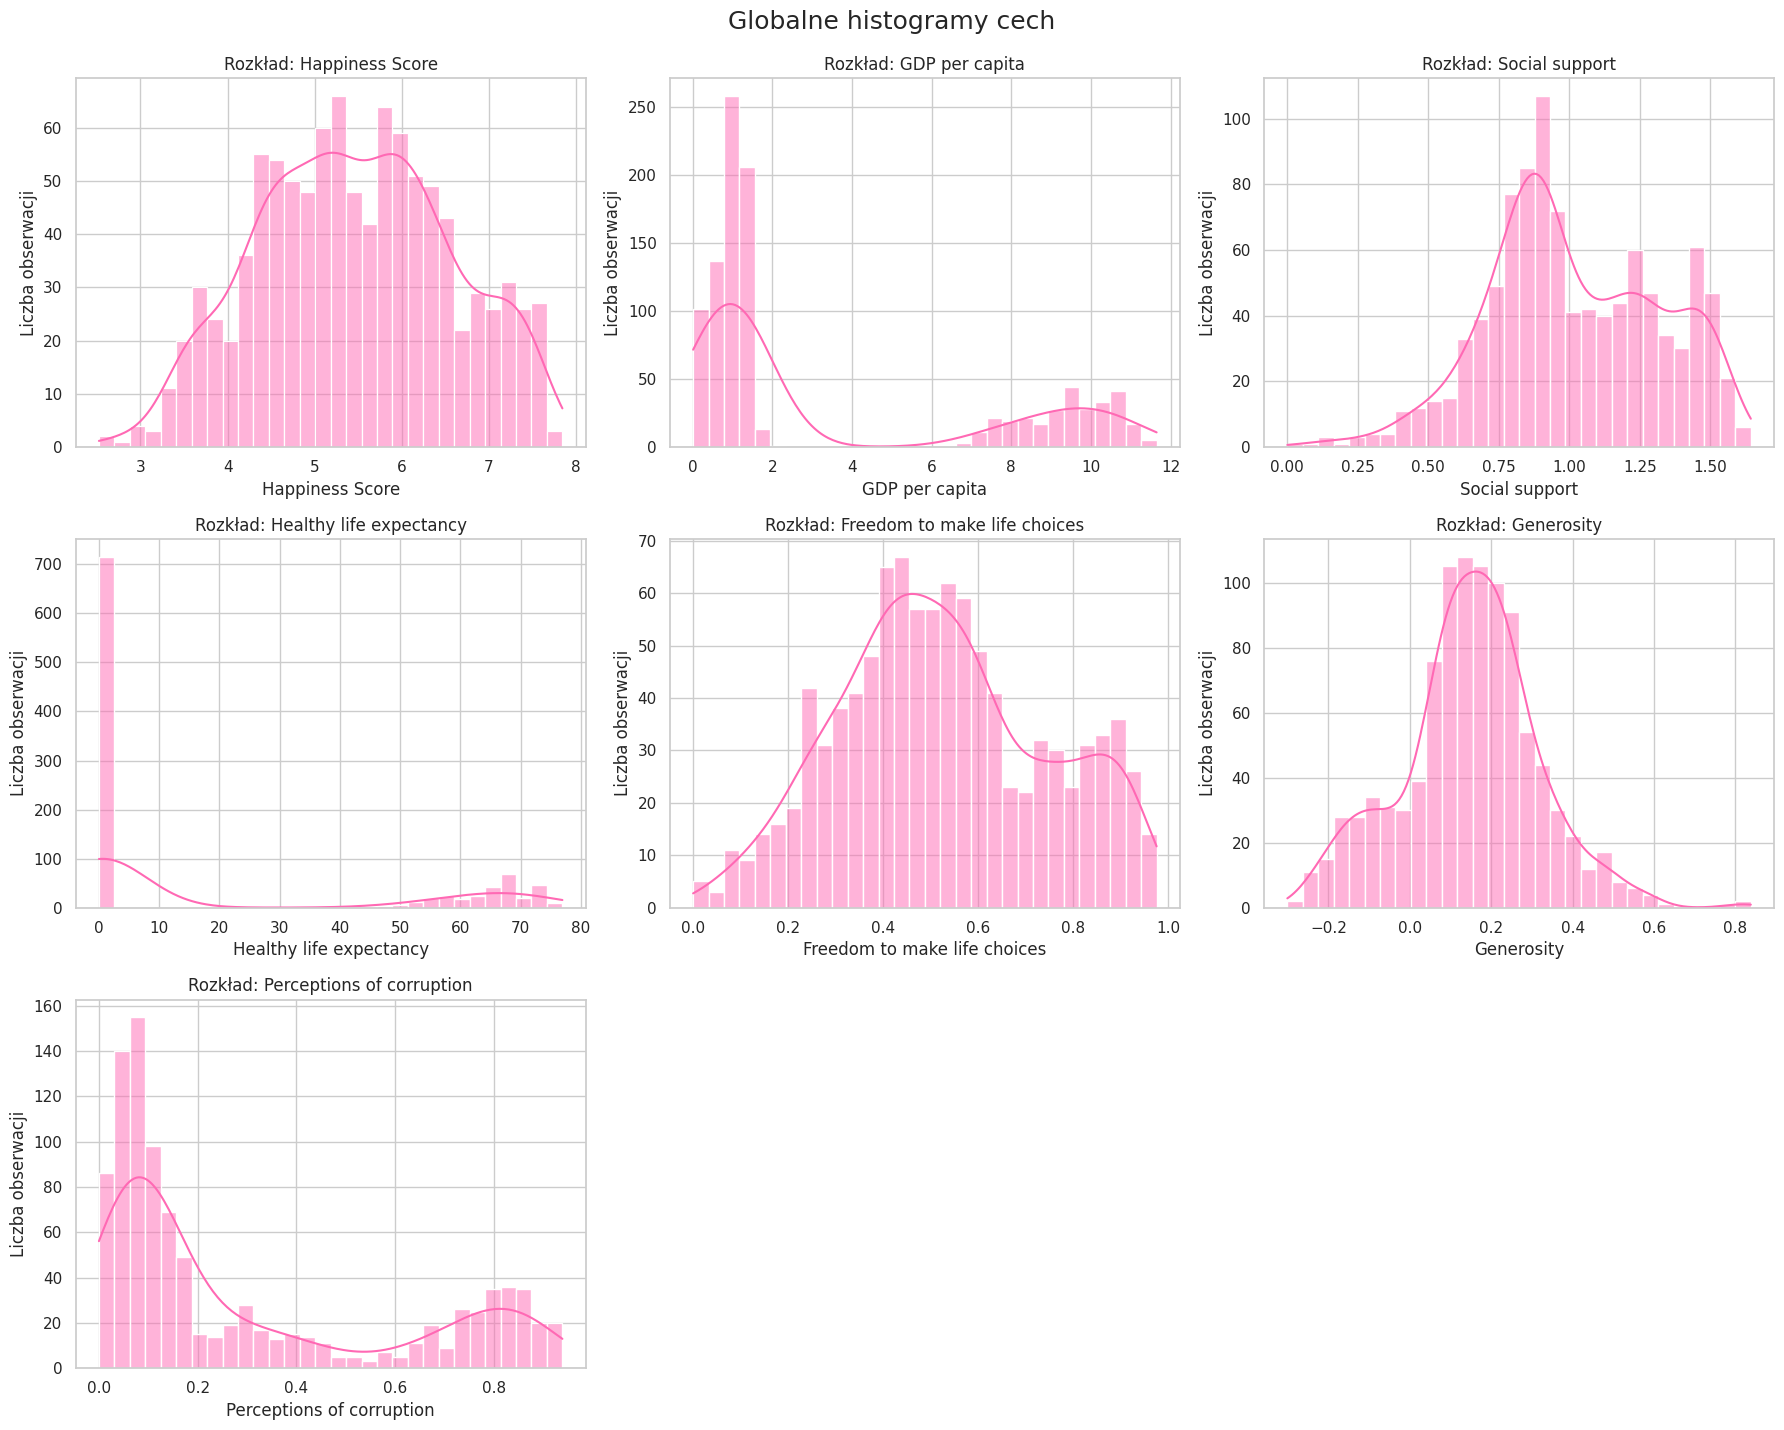

In [1553]:
# Tworzenie histogramów dla każdej cechy
plt.figure(figsize=(18, 14))

for i, cecha in enumerate(cechy, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[cecha], kde=True, bins=30, color="#FF69B4")
    plt.title(f"Rozkład: {cecha}")
    plt.xlabel(cecha)
    plt.ylabel("Liczba obserwacji")
    plt.tight_layout()

plt.suptitle("Globalne histogramy cech", fontsize=18, y=1.02)
plt.show()


In [1554]:
df = df_final_no2022.copy()

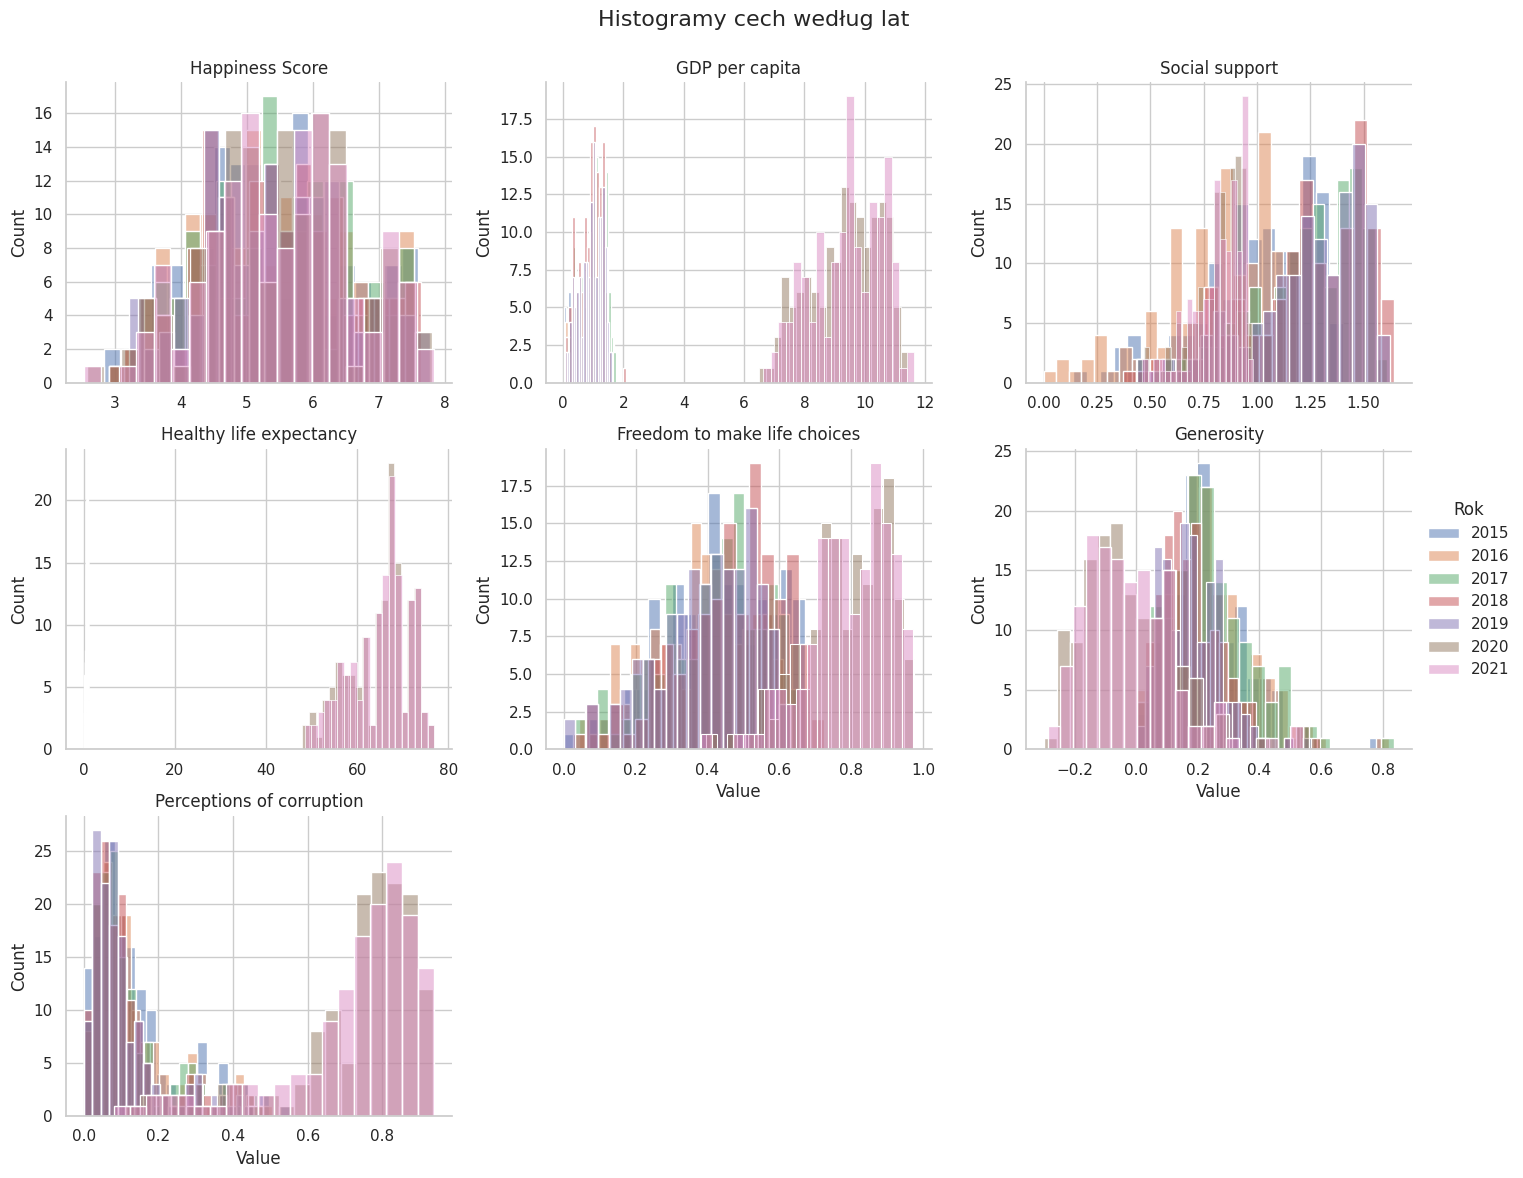

In [1555]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
columns_to_plot = [col for col in numeric_columns if col != 'Year']
# Usunięcie kolumny 'Happiness Rank' z danych
columns_to_plot_filtered = [col for col in columns_to_plot if col != 'Happiness Rank']

# Przekształcenie danych na długi format
df_long_filtered = df.melt(id_vars=["Year"], value_vars=columns_to_plot_filtered, var_name="Feature", value_name="Value")

# Ponowne tworzenie wykresów typu FacetGrid
g = sns.FacetGrid(df_long_filtered, col="Feature", col_wrap=3, hue="Year", sharex=False, sharey=False, height=4, aspect=1.2)
g.map(sns.histplot, "Value", bins=20, alpha=0.5)
g.add_legend(title="Rok")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Histogramy cech według lat", fontsize=16)
plt.show()

📈 1. Happiness Score
Rozkład: Lekko lewoskośny

Opis: Większość krajów ma wyniki w zakresie 4–6, niewiele krajów jest ekstremalnie szczęśliwych (powyżej 7) lub bardzo nieszczęśliwych (poniżej 3).

Wnioski: Dane są stosunkowo równomiernie rozłożone ze skłonnością do środka.

💰 2. GDP per capita
Rozkład: bimodalny - dane są skupione wokół dwóch poziomów szczęścia

Opis: Większość krajów ma niski dochód na osobę, a tylko kilka ma bardzo wysokie wartości (np. Luksemburg, Norwegia).

Wnioski: Transformacja logarytmiczna może być pomocna, np. w regresji.


In [1556]:
# Sprawdźmy zakres wartości GDP per capita dla każdego roku osobno
gdp_by_year = df.groupby("Year")["GDP per capita"].agg(["min", "max", "median", "mean", "std", "count"])
gdp_by_year


,min,max,median,mean,std,count
Year,,,,,,
2015,0.015300,1.563910,0.920490,0.859113,0.391672,143
2016,0.068310,1.697520,1.032345,0.971170,0.396384,142
2017,0.091623,1.741944,1.074988,1.003159,0.401965,143
2018,0.076000,2.096000,0.970000,0.909083,0.376490,144
2019,0.046000,1.609000,0.986000,0.928986,0.375981,144
2020,6.492642,11.450681,9.505480,9.354137,1.162669,144
2021,6.635000,11.647000,9.573000,9.445937,1.158824,144


Wniosek: Radykalna zmiana skali w 2020 i 2021

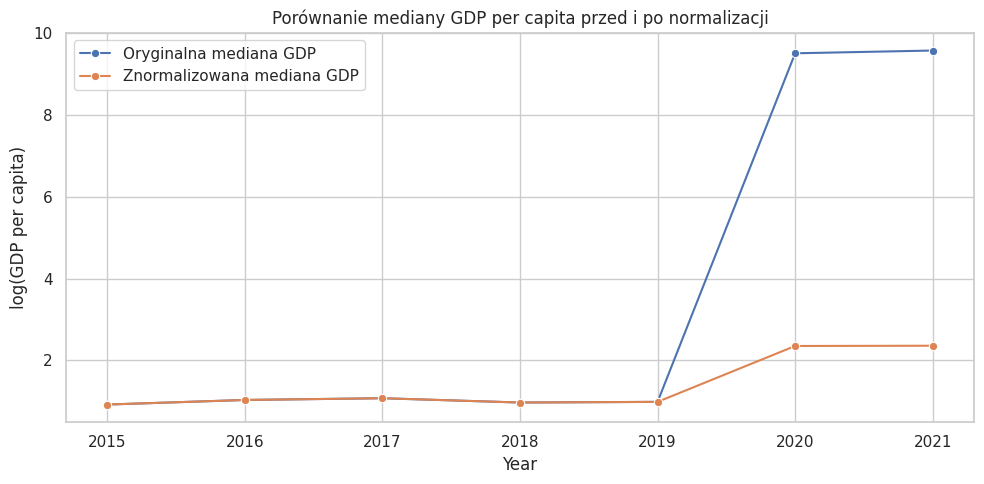

In [1557]:
# Utwórz nową kolumnę GDP_log_consistent w df_final_no2022 z uwzględnieniem różnic w latach
df["GDP_log_consistent"] = df.apply(
    lambda row: np.log1p(row["GDP per capita"]) if row["Year"] >= 2020 else row["GDP per capita"],
    axis=1
)

# Oblicz medianę dla każdej wersji GDP w podziale na rok
gdp_medians = df.groupby("Year")[["GDP per capita", "GDP_log_consistent"]].median().reset_index()

# Wykres porównawczy mediany w czasie
plt.figure(figsize=(10, 5))
sns.lineplot(data=gdp_medians, x="Year", y="GDP per capita", marker="o", label="Oryginalna mediana GDP")
sns.lineplot(data=gdp_medians, x="Year", y="GDP_log_consistent", marker="o", label="Znormalizowana mediana GDP")
plt.title("Porównanie mediany GDP per capita przed i po normalizacji")
plt.ylabel("log(GDP per capita)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [1558]:
# Usunięcie oryginalnej kolumny i przypisanie wersji logarytmicznej pod nazwą 'GDP per capita'

if "GDP_log_consistent" in df.columns:
    df = df.drop(columns=["GDP per capita"], errors="ignore")
    df["GDP per capita"] = df["GDP_log_consistent"]
    df = df.drop(columns=["GDP_log_consistent"])
# Potwierdzenie zmian
df.columns


Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'GDP per capita'],
      dtype='object')

In [1559]:
df

,Year,Country,Region,Happiness Rank,Happiness Score,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP per capita
0,2015,Switzerland,Western Europe,1.0,7.587,1.34951,0.94143,0.66557,0.29678,0.41978,1.396510
1,2015,Iceland,Western Europe,2.0,7.561,1.40223,0.94784,0.62877,0.43630,0.14145,1.302320
2,2015,Denmark,Western Europe,3.0,7.527,1.36058,0.87464,0.64938,0.34139,0.48357,1.325480
3,2015,Norway,Western Europe,4.0,7.522,1.33095,0.88521,0.66973,0.34699,0.36503,1.459000
4,2015,Canada,North America and ANZ,5.0,7.427,1.32261,0.90563,0.63297,0.45811,0.32957,1.326290
...,...,...,...,...,...,...,...,...,...,...,...
999,2021,Lesotho,Sub-Saharan Africa,145.0,3.512,0.78700,48.70000,0.71500,-0.13100,0.91500,2.188968
1000,2021,Botswana,Sub-Saharan Africa,146.0,3.467,0.78400,59.26900,0.82400,-0.24600,0.80100,2.377878
1001,2021,Rwanda,Sub-Saharan Africa,147.0,3.415,0.55200,61.40000,0.89700,0.06100,0.16700,2.160561
1002,2021,Zimbabwe,Sub-Saharan Africa,148.0,3.145,0.75000,56.20100,0.67700,-0.04700,0.82100,2.190871


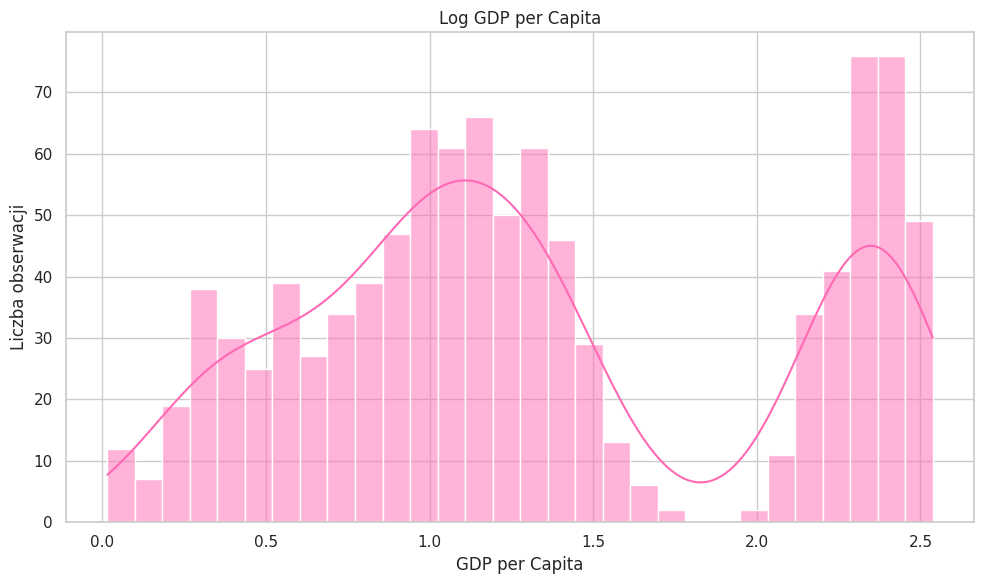

In [1560]:
plt.figure(figsize=(10, 6))
sns.histplot(df["GDP per capita"], kde=True, bins=30, color="#FF69B4")
plt.title("Log GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Liczba obserwacji")
plt.tight_layout()
plt.show()

Widać wciąż dwa główne skupiska:jedno przy wartościach około 0.3–1.3 (prawdopodobnie kraje o niskim lub średnim dochodzie),

drugie przy około 2.1–2.5 (kraje wysokodochodowe),

i przerwa między nimi (1.5–2.0), gdzie występuje niższa liczba obserwacji.


👨‍👩‍👧 3. Social support
Rozkład: Dość symetryczny, lekko lewoskośny

Opis: Większość wartości oscyluje w granicach 0.7–0.9, ale są wyjątki z bardzo niskim wsparciem społecznym (Afghanistan, Togo).

Wnioski: Dobrze zdefiniowana cecha z kilkoma ekstremami.

🏥 4. Healthy life expectancy
Rozkład: Bimodalny: Wyraźny, nienaturalny pik przy wartości bliskiej 0.
To najprawdopodobniej brakujące dane zakodowane jako 0, a nie rzeczywiste wartości.

Wartości 0 należy uznać za braki danych (NaN)

Wartości mieszczą się głównie w zakresie 60–75 lat.


In [1561]:
df["Healthy life expectancy"].describe()

,Healthy life expectancy
count,1004.000000
mean,19.090196
std,29.339900
min,0.000000
25%,0.582855
50%,0.790780
75%,56.097485
max,76.953000


In [1562]:
# Obserwacje poniżej 1
below_1 = df[df["Healthy life expectancy"] < 1]
num_below_1 = below_1.shape[0]
countries_below_1 = below_1[["Country", "Year", "Region", "Healthy life expectancy"]]

# Oczyszczenie danych (wartości większe lub równe 1)
df_cleaned = df[df["Healthy life expectancy"] >= 1]

# Kraje z najniższą i najwyższą wartością po oczyszczeniu
min_hle = df_cleaned.nsmallest(5, "Healthy life expectancy")[["Country", "Year", "Region", "Healthy life expectancy"]]
max_hle = df_cleaned.nlargest(5, "Healthy life expectancy")[["Country", "Year", "Region", "Healthy life expectancy"]]


In [1563]:
min_hle

,Country,Year,Region,Healthy life expectancy
460,Singapore,2018,Southeast Asia,1.00800
578,Sweden,2019,Western Europe,1.00900
585,Luxembourg,2019,Western Europe,1.01200
66,Hong Kong,2015,East Asia,1.01328
581,Austria,2019,Western Europe,1.01600


In [1564]:
max_hle

,Country,Year,Region,Healthy life expectancy
891,Singapore,2021,Southeast Asia,76.953000
935,Hong Kong,2021,East Asia,76.820000
746,Singapore,2020,Southeast Asia,76.804581
791,Hong Kong,2020,East Asia,76.771706
915,Japan,2021,East Asia,75.100000


Rekordy z wartościami ok. 1 roku u krajów rozwiniętych (jak np. Szwecja) są niespójne z innymi latami dla tych samych krajów, co sugeruje błąd w danych (np. tylko fragment oryginalnej liczby został zaimportowany).

Dobrym rozwiązaniem byłoby usunąć lub uzupełnić dane < 30 lat, jako że oczekiwana długość życia w zdrowiu w rzeczywistości nigdzie na świecie nie wynosi 1 rok.

In [1565]:
# Automatyczne czyszczenie danych: wartości < 30 traktujemy jako brak danych (NaN)
df_cleaned_threshold = df.copy()
df_cleaned_threshold.loc[df_cleaned_threshold["Healthy life expectancy"] < 30, "Healthy life expectancy"] = pd.NA

# Sprawdzenie ile danych zostało usuniętych
num_cleaned = df.shape[0] - df_cleaned_threshold["Healthy life expectancy"].count()

# Wyświetlenie kilku przykładów po czyszczeniu
sample_after_cleaning = df_cleaned_threshold[df_cleaned_threshold["Healthy life expectancy"].isna()].head()

num_cleaned, sample_after_cleaning


(np.int64(716),
    Year      Country                 Region  Happiness Rank  Happiness Score  \
 0  2015  Switzerland         Western Europe             1.0            7.587   
 1  2015      Iceland         Western Europe             2.0            7.561   
 2  2015      Denmark         Western Europe             3.0            7.527   
 3  2015       Norway         Western Europe             4.0            7.522   
 4  2015       Canada  North America and ANZ             5.0            7.427   
 
    Social support  Healthy life expectancy  Freedom to make life choices  \
 0         1.34951                      NaN                       0.66557   
 1         1.40223                      NaN                       0.62877   
 2         1.36058                      NaN                       0.64938   
 3         1.33095                      NaN                       0.66973   
 4         1.32261                      NaN                       0.63297   
 
    Generosity  Perceptions of c

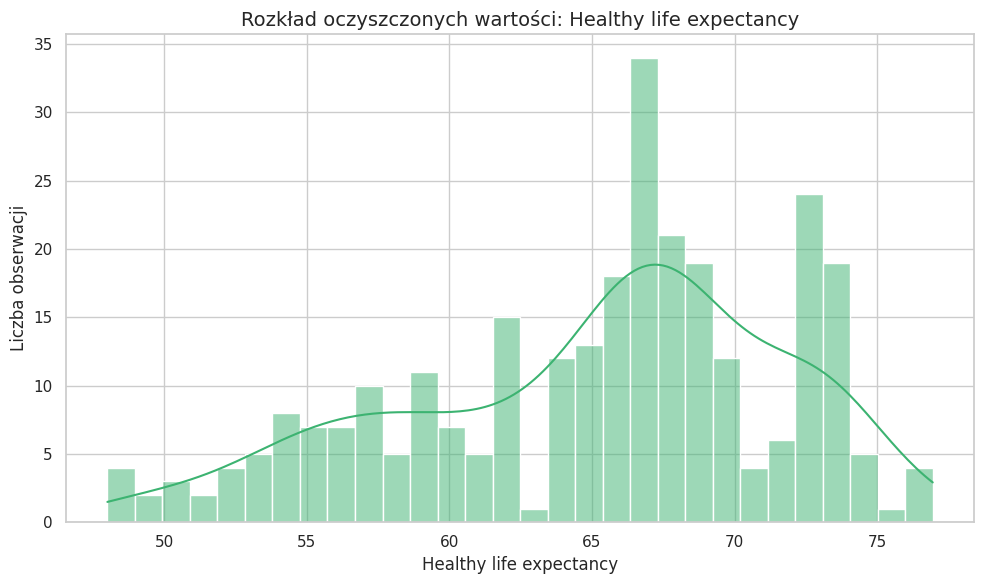

In [1566]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wykres histogramu po czyszczeniu (bez wartości < 30)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_threshold["Healthy life expectancy"].dropna(), kde=True, bins=30, color="mediumseagreen")
plt.title("Rozkład oczyszczonych wartości: Healthy life expectancy", fontsize=14)
plt.xlabel("Healthy life expectancy")
plt.ylabel("Liczba obserwacji")
plt.tight_layout()
plt.show()


Zakres wartości mieści się teraz w realistycznym przedziale ok. 53–77 lat.

Rozkład ma kształt lekko lewoskośny – więcej krajów znajduje się w wyższych przedziałach oczekiwanej długości życia w zdrowiu.

Szczyt rozkładu występuje w okolicach 72–75 lat, co odpowiada wysokiemu poziomowi zdrowia publicznego w wielu krajach rozwiniętych.

In [1567]:
# aktualizujemy te ceche w naszej ramce
df_cleaned_threshold
df = df_cleaned_threshold.copy()

In [1568]:
df

,Year,Country,Region,Happiness Rank,Happiness Score,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP per capita
0,2015,Switzerland,Western Europe,1.0,7.587,1.34951,NaN,0.66557,0.29678,0.41978,1.396510
1,2015,Iceland,Western Europe,2.0,7.561,1.40223,NaN,0.62877,0.43630,0.14145,1.302320
2,2015,Denmark,Western Europe,3.0,7.527,1.36058,NaN,0.64938,0.34139,0.48357,1.325480
3,2015,Norway,Western Europe,4.0,7.522,1.33095,NaN,0.66973,0.34699,0.36503,1.459000
4,2015,Canada,North America and ANZ,5.0,7.427,1.32261,NaN,0.63297,0.45811,0.32957,1.326290
...,...,...,...,...,...,...,...,...,...,...,...
999,2021,Lesotho,Sub-Saharan Africa,145.0,3.512,0.78700,48.700,0.71500,-0.13100,0.91500,2.188968
1000,2021,Botswana,Sub-Saharan Africa,146.0,3.467,0.78400,59.269,0.82400,-0.24600,0.80100,2.377878
1001,2021,Rwanda,Sub-Saharan Africa,147.0,3.415,0.55200,61.400,0.89700,0.06100,0.16700,2.160561
1002,2021,Zimbabwe,Sub-Saharan Africa,148.0,3.145,0.75000,56.201,0.67700,-0.04700,0.82100,2.190871



🗽 5. Freedom to make life choices
Rozkład: Lekko prawoskośny

Opis: Większość krajów ma umiarkowaną wolność, ale kilka krajów (zwłaszcza skandynawskich) ma bardzo wysokie wartości.

Wnioski: Może być powiązany z kulturą polityczną i poziomem demokracji.

💝 6. Generosity
Rozkład: Silnie prawoskośny

Opis: Większość krajów ma wartości bliskie 0 lub nawet ujemne, a tylko kilka ma bardzo wysoką hojność (np. Myanmar, Tajlandia).

Wnioski: Ta cecha jest bardzo nierównomierna, trudna do modelowania — może wymagać np. winsoryzacji, czyli przycięcia skrajnych wartości:

In [1569]:
# Podstawowe statystyki zmiennej 'Generosity'
generosity_stats = df_final["Generosity"].describe(percentiles=[.01, .25, .5, .75, .99])
generosity_stats


,Generosity
count,1004.000000
mean,0.147727
std,0.168196
min,-0.300907
1%,-0.235846
25%,0.058307
50%,0.153000
75%,0.247251
99%,0.565125
max,0.838075


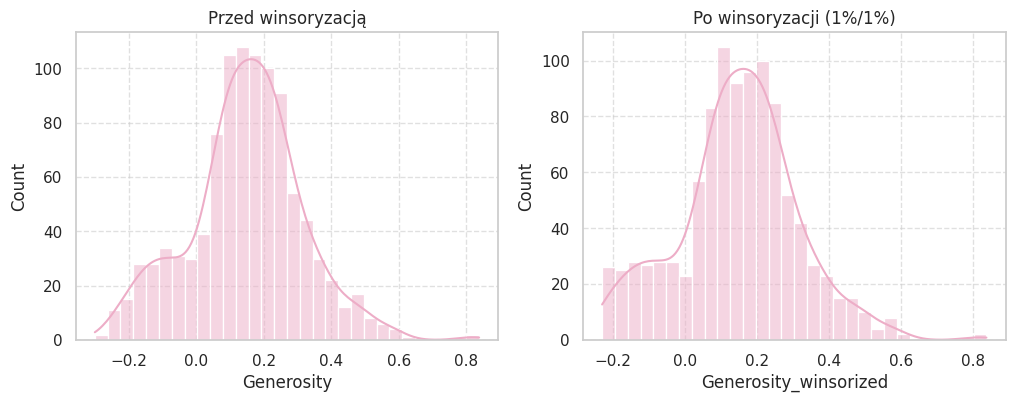

In [1570]:

# Winsoryzacja: przycinamy 1% wartości z lewej i prawej strony
generosity_winsorized = winsorize(df_final["Generosity"], limits=[0.01, 0.01])

# Dodanie nowej kolumny do ramki danych
df_final["Generosity_winsorized"] = generosity_winsorized

# Wizualizacja przed i po winsoryzacji
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_final["Generosity"], bins=30, kde=True, color="#EDADC7", ax=axes[0])
axes[0].set_title("Przed winsoryzacją")
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.histplot(df_final["Generosity_winsorized"], bins=30, kde=True, color="#EDADC7", ax=axes[1])
axes[1].set_title("Po winsoryzacji (1%/1%)")
axes[1].grid(True, linestyle='--', alpha=0.6)



⚖️ 7. Perceptions of corruption
Rozkład: Silnie prawoskośny

Opis: Większość krajów ocenia korupcję jako wysoką (niskie wartości), tylko nieliczne uznawane są za transparentne (wysokie wartości).

Wnioski: Silna asymetria, co może wpływać na analizę korelacyjną i regresję.

## Wartości odstajace

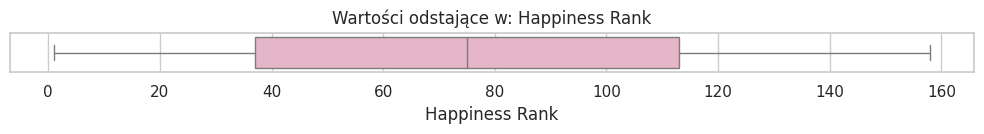

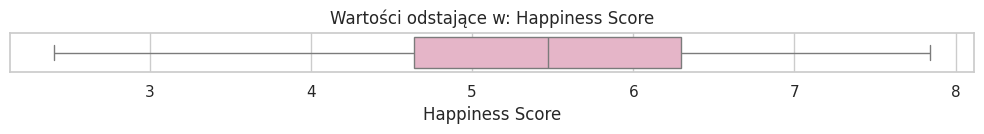

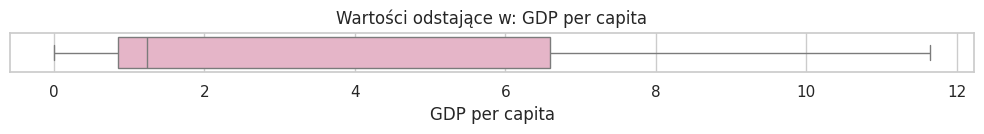

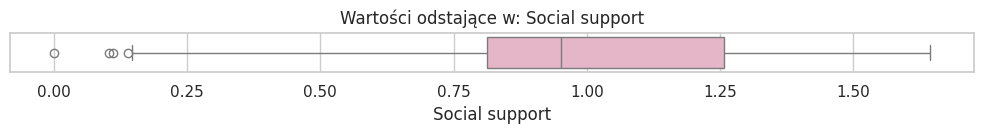

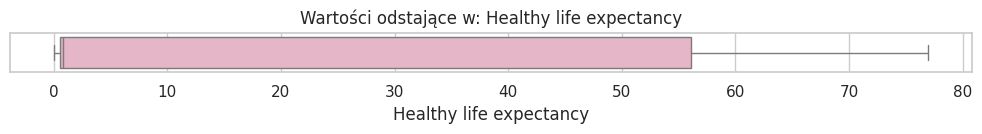

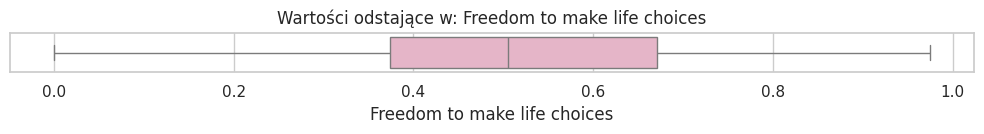

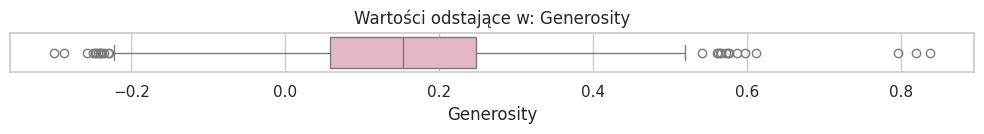

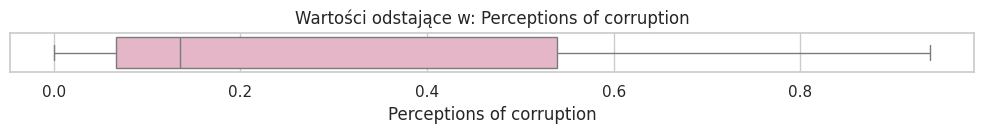

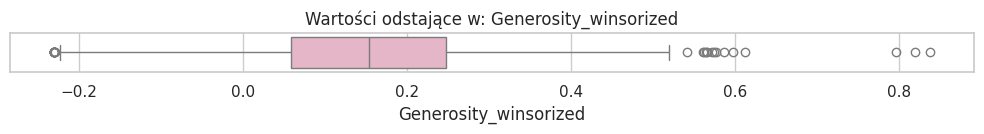

In [1571]:
# Outliery
numeric_columns = df_final.select_dtypes(include='number').columns.drop('Year')

# Tworzenie wykresów boxplot (bez 'Year')
for col in numeric_columns:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(data=df_final, x=col, color="#EDADC7")
    plt.title(f'Wartości odstające w: {col}')
    plt.tight_layout()
    plt.show()

Skupmz sie na tych boxplotach:

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning:


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning:




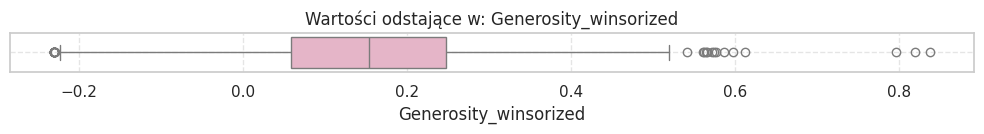

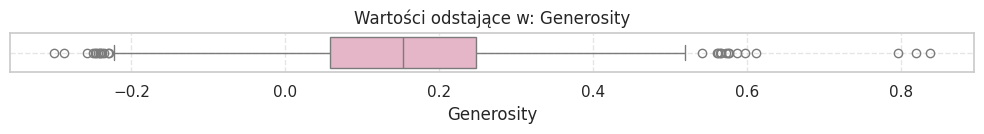

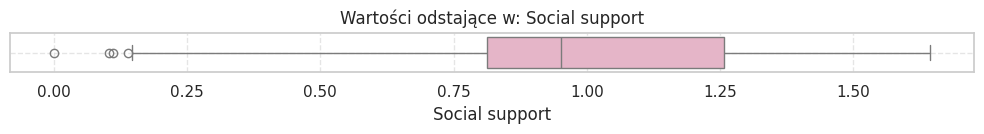

In [1585]:
# Ponowne zdefiniowanie danych z analizy outlierów
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

# Potwierdzenie, że funkcja została załadowana
"Funkcja detect_outliers_iqr zdefiniowana."


outlier_summary = []

for col in numeric_columns:
    series = df_final[col].dropna()
    count, low, high = detect_outliers_iqr(series)
    outlier_summary.append({
        "Cecha": col,
        "Liczba outlierów": count,
        "Dół (min bezpieczny)": round(low, 3),
        "Góra (max bezpieczny)": round(high, 3),
        "Procent danych jako outliery": round(100 * count / len(series), 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Procent danych jako outliery", ascending=False)

# Teraz wybieramy kolumny z outlierami
columns_with_outliers = outlier_df[outlier_df["Liczba outlierów"] > 0]["Cecha"].tolist()

# Tworzenie wykresów boxplot
for col in columns_with_outliers:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(data=df_final, x=col, color="#EDADC7")
    plt.title(f'Wartości odstające w: {col}')
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


## **Wnioski**

### 📌 Wnioski z analizy outlierów i rekomendacje

Generosity to zmienna o największej liczbie wartości odstających (ponad 2,6% danych). Wartości te silnie odstają od reszty i zaburzają analizę – dlatego mozna zastosować winsoryzację (1%/1%).

Perceptions of corruption również wykazuje znaczną prawoskośność i obecność outlierów.

Dodatkowo znaleziono 6 wartości 0.0, które zostały uznane za błędne lub brakujące i zastąpić NaN. Można zastosować winsoryzację

Inne cechy, takie jak Freedom czy Healthy life expectancy, zawierają niewielką liczbę outlierów, jednak nie mają one istotnego wpływu na rozkład – mogą pozostać w danych bez dodatkowych transformacji.
---


## Analiza opisowa

In [1572]:
df

,Year,Country,Region,Happiness Rank,Happiness Score,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP per capita
0,2015,Switzerland,Western Europe,1.0,7.587,1.34951,NaN,0.66557,0.29678,0.41978,1.396510
1,2015,Iceland,Western Europe,2.0,7.561,1.40223,NaN,0.62877,0.43630,0.14145,1.302320
2,2015,Denmark,Western Europe,3.0,7.527,1.36058,NaN,0.64938,0.34139,0.48357,1.325480
3,2015,Norway,Western Europe,4.0,7.522,1.33095,NaN,0.66973,0.34699,0.36503,1.459000
4,2015,Canada,North America and ANZ,5.0,7.427,1.32261,NaN,0.63297,0.45811,0.32957,1.326290
...,...,...,...,...,...,...,...,...,...,...,...
999,2021,Lesotho,Sub-Saharan Africa,145.0,3.512,0.78700,48.700,0.71500,-0.13100,0.91500,2.188968
1000,2021,Botswana,Sub-Saharan Africa,146.0,3.467,0.78400,59.269,0.82400,-0.24600,0.80100,2.377878
1001,2021,Rwanda,Sub-Saharan Africa,147.0,3.415,0.55200,61.400,0.89700,0.06100,0.16700,2.160561
1002,2021,Zimbabwe,Sub-Saharan Africa,148.0,3.145,0.75000,56.201,0.67700,-0.04700,0.82100,2.190871


In [1573]:
# 8) Mapa świata (choropleth) – średni poziom szczęścia

mean_scores = (
    df.groupby("Country")["Happiness Score"]
      .mean()
      .reset_index()
)

fig = px.choropleth(
    mean_scores,
    locations="Country",
    locationmode="country names",
    color="Happiness Score",
    color_continuous_scale="Pinkyl",
    title="Średni (2015‑2021) Happiness Score – mapa świata"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


Najszczęśliwsze obszary to Europa Północna i Oceania; najniższe wyniki koncentrują się w Afryce Subsaharyjskiej i w kilku państwach Azji Południowej.
Jest to ciekawe biorąc pod uwagę, że na liście państ z najwyższym happiness score (ukazane na jednym z wcześniejszych wykresów) domunują pńastwa z Afryki oraz krajów rozwijających się.

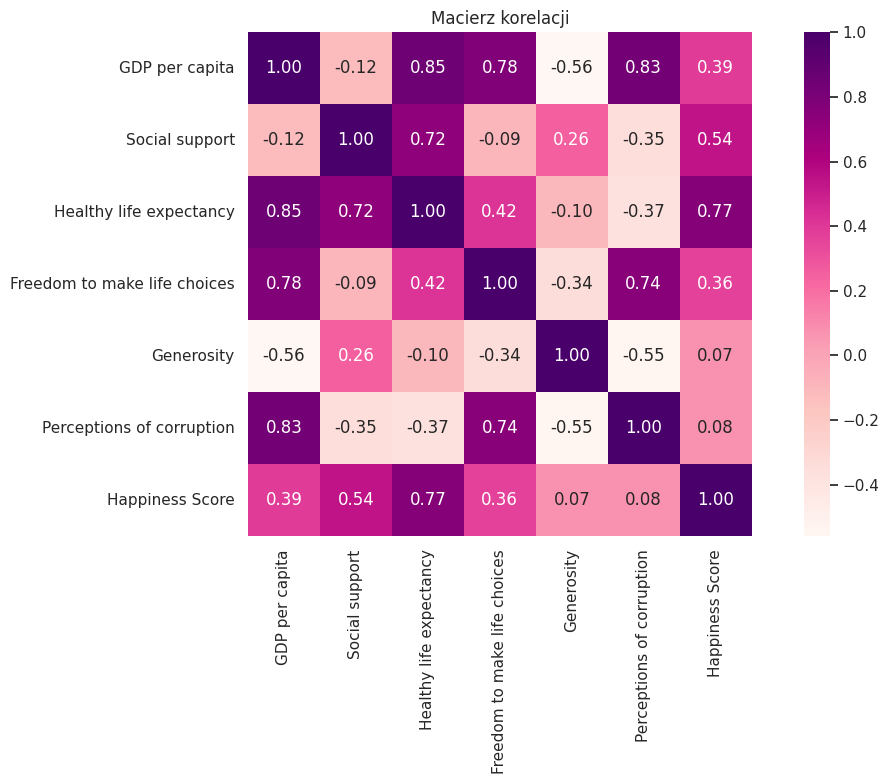

In [1574]:
# Wybór tylko kolumn do analizy korelacji
cols_corr = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Happiness Score']


# Obliczenie macierzy korelacji
correlation_matrix = df[cols_corr].corr()

# Wizualizacja
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdPu", square=True)
plt.title("Macierz korelacji")
plt.tight_layout()
plt.show()



Poziom szczęścia jest silnie skorelowany z:

Social support (0.54)

GDP per capita (0.39)

Healthy life expectancy (0.77)



a najmniej z Perceptions of corruption (0.08) i Generosity (0.07)

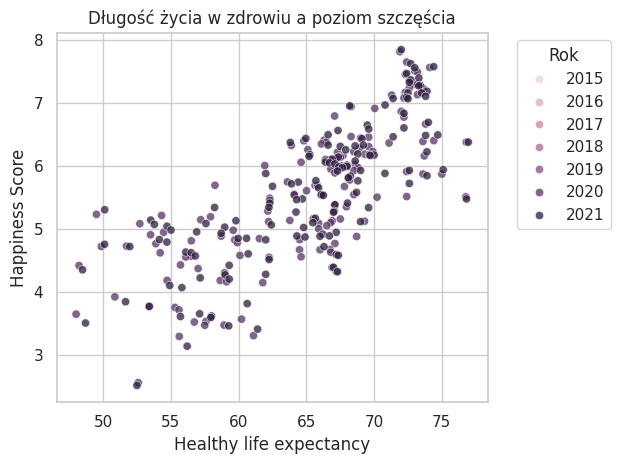

In [1575]:
#df = df_final_no2022.copy()          # robocza kopia
#sns.set(style="whitegrid")
#plt.rcParams["figure.figsize"] = (10, 6)

# -------------------------------------------------------------------
# 1) PKB per capita vs. Happiness Score
plt.figure()
sns.scatterplot(
    data=df,
    x="Healthy life expectancy",
    y="Happiness Score",
    hue="Year",
    alpha=0.75
)
plt.title("Długość życia w zdrowiu a poziom szczęścia")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Happiness Score")
plt.legend(title="Rok", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

 Widzimy wyraźną pozytywną korelację – kraje o wyższym PKB per capita mają zwykle wyższy poziom szczęścia.

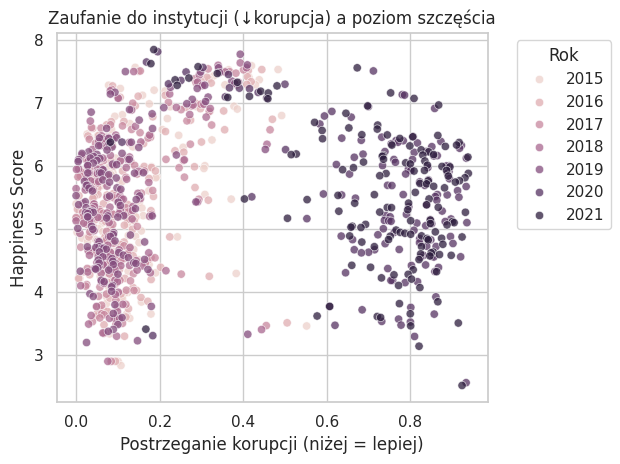

In [1576]:
# 2) Percepcja korupcji vs. Happiness Score
plt.figure()
sns.scatterplot(
    data=df,
    x="Perceptions of corruption",
    y="Happiness Score",
    hue="Year",
    alpha=0.75
)
plt.title("Zaufanie do instytucji (↓korupcja) a poziom szczęścia")
plt.xlabel("Postrzeganie korupcji (niżej = lepiej)")
plt.ylabel("Happiness Score")
plt.legend(title="Rok", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Mniejsze postrzeganie korupcji, a więc też i zaufanie do instytucji rządowych, wiąże się zazwyczaj z wyższym poziomem szczęścia, choć zależność ta nie jest tak silna jak w przypadku PKB.

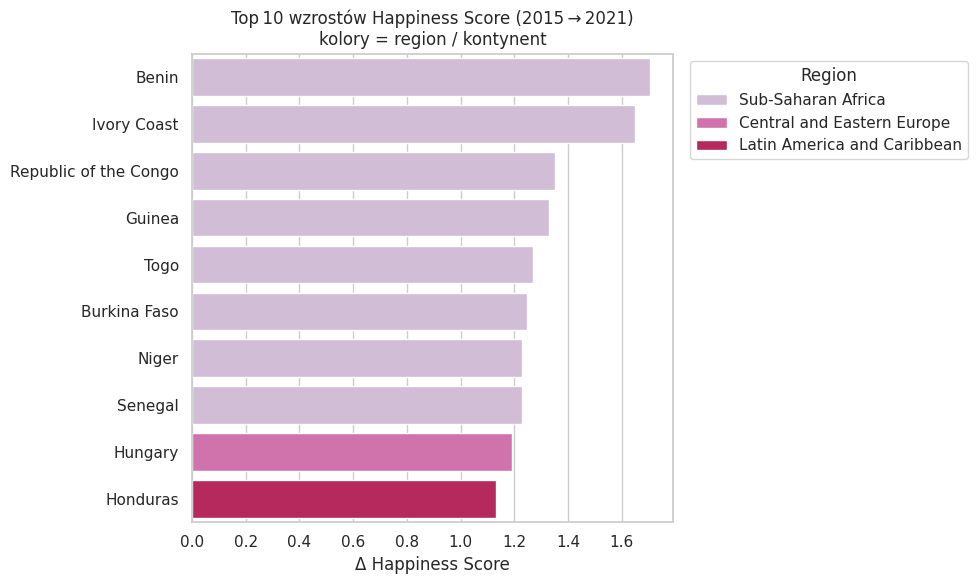

In [1577]:

# 3) Oblicz zmianę Happiness Score między pierwszym a ostatnim rokiem -------
first_year  = df["Year"].min()
last_year   = df["Year"].max()

pivot = (
    df.pivot(index="Country", columns="Year", values="Happiness Score")
      .dropna(subset=[first_year, last_year])        # usuń brakujące kraje
)
pivot["Delta"] = pivot[last_year] - pivot[first_year]

# --- 2) Wybierz 10 krajów z największym wzrostem --------------------------------
top10_inc = pivot.sort_values("Delta", ascending=False).head(10).reset_index()

# --- 3) Dołączenie kolumny Region ---------------------------------------------------
top10_inc = top10_inc.merge(
    df[["Country", "Region"]].drop_duplicates(),
    on="Country",
    how="left"
)

# --- 4) Wykres: barplot z hue = Region -----------------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top10_inc,
    y="Country",
    x="Delta",
    hue="Region",           # <— kolor wg regionu / kontynentu
    dodge=False,
    palette="PuRd"
)

plt.title(f"Top 10 wzrostów Happiness Score ({first_year} → {last_year})\nkolory = region / kontynent")
plt.xlabel("Δ Happiness Score")
plt.ylabel("")
plt.legend(title="Region", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

Największy wzrost poziomu szczęścia zaobserwowano w krajach rozwijających się – może to być efekt poprawy infrastruktury, edukacji i wsparcia społecznego, ale też wolniejszego tempa życia.

Spadki poziomu szczęścia często dotyczą krajów objętych kryzysami politycznymi, gospodarczymi lub społecznymi – jak np. Wenezuela czy Liban.

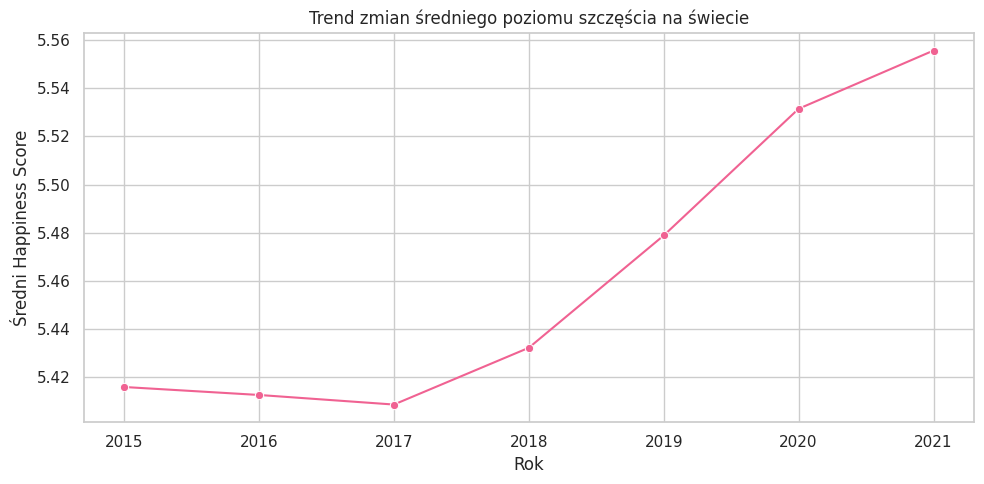

In [1578]:
#  5- Oblicz średni Happiness Score dla każdego roku
mean_by_year = (
    df.groupby("Year")["Happiness Score"]
    .mean()
    .reset_index()
)

# Liniowy wykres trendu
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=mean_by_year,
    x="Year",
    y="Happiness Score",
    marker="o",
    color="#f06292"
)

plt.title("Trend zmian średniego poziomu szczęścia na świecie")
plt.xlabel("Rok")
plt.ylabel("Średni Happiness Score")
plt.tight_layout()
plt.show()


Wnioske: Widoczna jest tendencja wzrostowa postrzegania poziomu szczęścia wraz z upływem lat.
Z drugiej storny, obserwujemy tylko niewielkie zmiany (rzędu setnych punktu) globalnego poziomu szczęścia pomiędzy kolejnymi latami.
Może to wskazywać, że poprawa lub pogorszenie dobrostanu w części krajów jest równoważone przez zmiany o przeciwnym wektorze w innych regionach lub oznaczać rosnące wymagania społeczeństwa i tendencje do zachowawczości w ocenie szczęścia.

/tmp/ipython-input-1579-1542076721.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




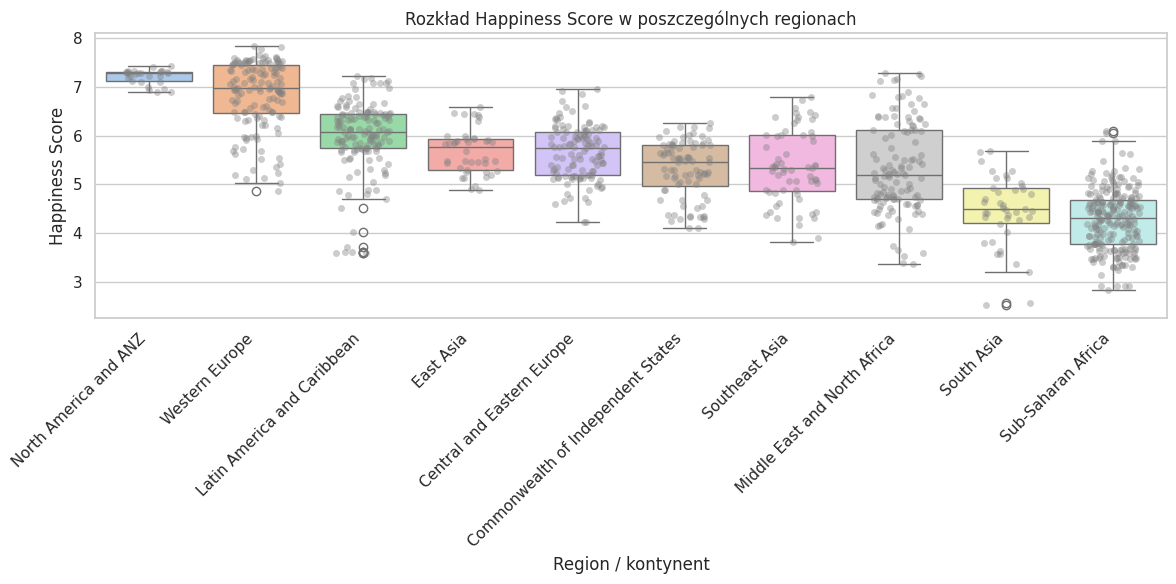

In [1579]:
# 6) Kolejność regionów wg mediany Happiness Score (żeby łatwiej porównać)
median_by_region = (
    df.groupby("Region")["Happiness Score"]
      .median()
      .sort_values(ascending=False)
)
ordered_regions = median_by_region.index.tolist()

# (2) Boxplot + punkty dla każdego kraju
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="Region",
    y="Happiness Score",
    order=ordered_regions,
    palette="pastel"
)
sns.stripplot(
    data=df,
    x="Region",
    y="Happiness Score",
    order=ordered_regions,
    color="gray",
    alpha=0.4,
    jitter=0.25
)

plt.title("Rozkład Happiness Score w poszczególnych regionach")
plt.xlabel("Region / kontynent")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Wnioski:
Najwyższe mediany mają zazwyczaj regiony Europy Zachodniej i Ameryki Północnej, co potwierdza, że kraje o wysokim PKB, dobrych systemach opieki społecznej i stabilnych instytucjach osiągają najwyższy poziom szczęścia.

Największa rozpiętość (długie „pudełka” i wąsy) występuje w Azji oraz Ameryce Łacińskiej, co wskazuje na znaczne wewnętrzne zróżnicowanie dobrostanu – obok bardzo szczęśliwych państw (np. Singapur, Kostaryka) istnieją kraje o dużo niższym wyniku.

Regiony Afryki Subsaharyjskiej i Azji Południowej charakteryzują się najniższą medianą i relatywnie wąskim rozkładem – większość państw w tych regionach osiąga podobnie niskie wyniki, co sugeruje wspólne wyzwania rozwojowe (bieda, konflikty, ograniczony dostęp do opieki zdrowotnej).

Outliers – punkty skrajne ujawniają wyjątkowe przypadki: np. niektóre kraje europejskie nadal górują zdecydowanie nad medianą, zaś kilka państw w bogatszych regionach (np. Europa Południowa) wypada poniżej typowego poziomu swoich sąsiadów, co podkreśla znaczenie czynników kulturowych i politycznych oprócz czysto ekonomicznych.

/tmp/ipython-input-1580-2967808258.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




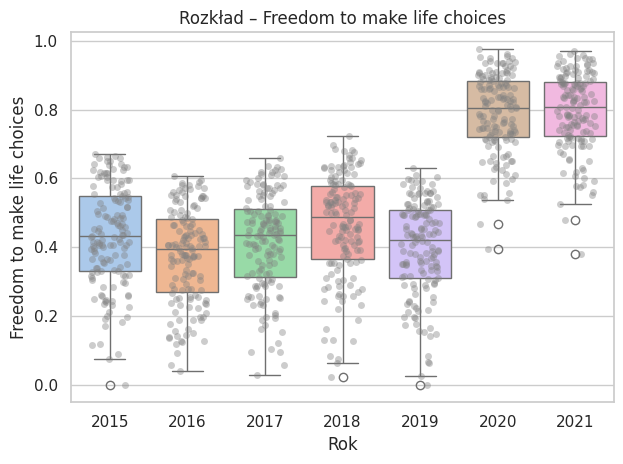

In [1580]:
# 7) Whiskers (boxplot) – Freedom to make life choices

plt.figure()
sns.boxplot(data=df, x="Year", y="Freedom to make life choices", palette="pastel")
sns.stripplot(data=df, x="Year", y="Freedom to make life choices",
              color="gray", alpha=0.4, jitter=0.25)
plt.title("Rozkład – Freedom to make life choices")
plt.xlabel("Rok")
plt.ylabel("Freedom to make life choices")
plt.tight_layout()
plt.subplots_adjust()

plt.show()

Rozrzut wolności wyboru życiowego jest największy w latach o skrajnych zdarzeniach politycznych (np. 2020, pandemia) – część krajów notuje spadki wolności, inne utrzymują wysoki poziom. Zmienność wolności wyboru wzrosła w 2020 r.; niektóre państwa ograniczyły swobody obywatelskie, inne utrzymały status quo.

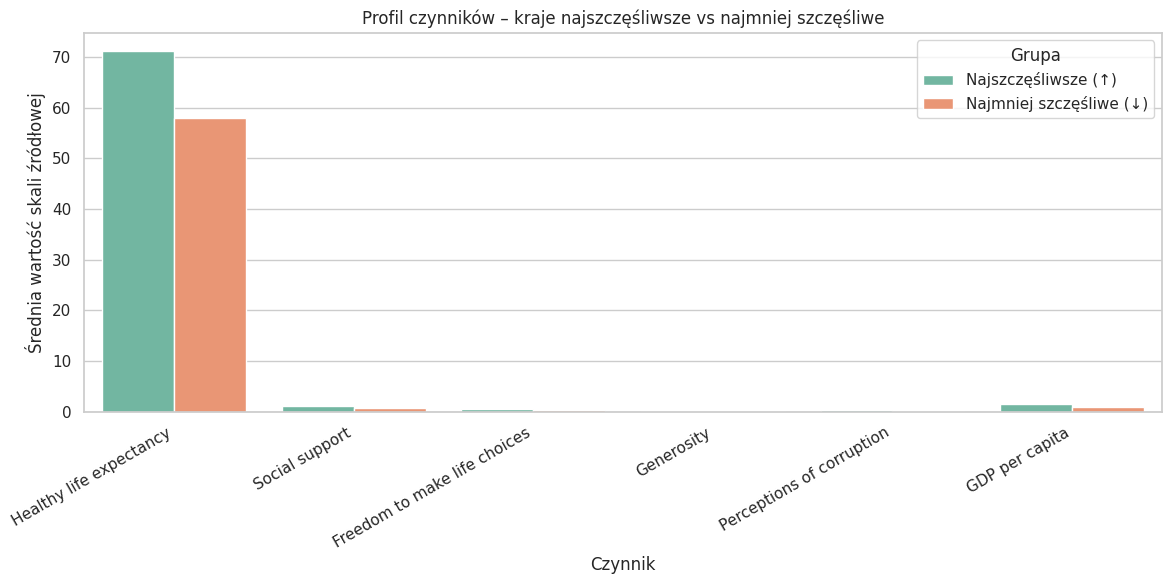

In [1581]:
# 9) „Konfiguracje” – jak skrajne wartości czynników przekładają się na szczęście
#      • porównujemy górny kwartyl vs dolny kwartyl Happiness Score

#  Lista zmiennych „czynnikowych”
PREDICTORS = [
    "Healthy life expectancy",
    "Social support",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "GDP per capita"
]


q75 = df["Happiness Score"].quantile(0.75)
q25 = df["Happiness Score"].quantile(0.25)

top = df[df["Happiness Score"] >= q75][PREDICTORS].mean()
bot = df[df["Happiness Score"] <= q25][PREDICTORS].mean()

config = (
    pd.DataFrame({"Najszczęśliwsze (↑)": top, "Najmniej szczęśliwe (↓)": bot})
      .reset_index()
      .rename(columns={"index": "Czynnik"})
)
config = config.melt(id_vars="Czynnik", var_name="Grupa", value_name="Średnia")

plt.figure(figsize=(12, 6))
sns.barplot(data=config, x="Czynnik", y="Średnia", hue="Grupa", palette="Set2")
plt.title("Profil czynników – kraje najszczęśliwsze vs najmniej szczęśliwe")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Średnia wartość skali źródłowej")
plt.tight_layout()
plt.show()


Najsilniej z Happiness Score koreluje Healthy life expectancy. Najslabiej Generosity i Perpception of Corruption.

In [1582]:
# Tabela z różnicami
summary_table = pd.DataFrame({
    "Top 25%": top,
    "Bottom 25%": bot,
    "Różnica": top - bot
}).sort_values("Różnica", ascending=False)



In [1583]:
summary_table

,Top 25%,Bottom 25%,Różnica
Healthy life expectancy,71.162592,57.877521,13.285070
GDP per capita,1.651035,0.895920,0.755115
Social support,1.201813,0.796603,0.405209
Freedom to make life choices,0.634697,0.434200,0.200497
Perceptions of corruption,0.323360,0.255625,0.067735
Generosity,0.197199,0.173188,0.024011


Healthy life expectancy: różnica aż +13,3 lat – kluczowy czynnik!

GDP per capita: różnica +0,75 jednostki logarytmicznej – bardzo silny wpływ.

Social support: różnica +0,41 – silna zależność społeczna.

Freedom to make life choices: różnica +0,20

Perceptions of corruption: różnica +0,07

## Zmiana średniego poziomu szczęścia w regionach (2019 → 2021)

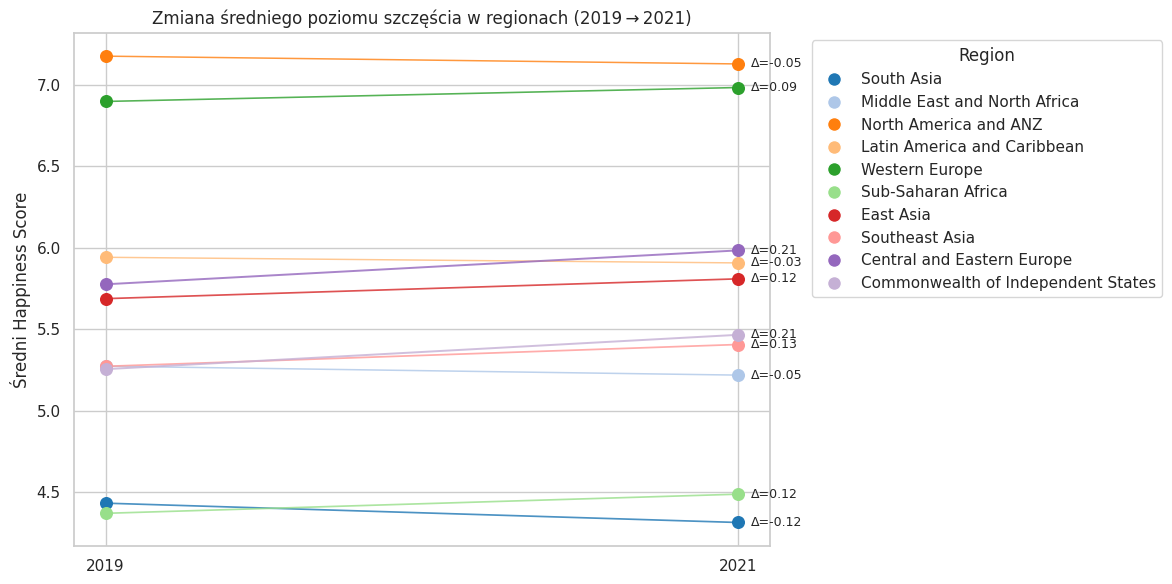

In [1584]:

# Przygotowanie danych
years = [2019, 2021]
df = df_final_no2022[df_final_no2022["Year"].isin(years)]

mean_by_region = (
    df.groupby(["Region", "Year"])["Happiness Score"]
      .mean()
      .unstack()
      .reset_index()
      .rename(columns={2019: "Score_2019", 2021: "Score_2021"})
)

mean_by_region["Delta"] = mean_by_region["Score_2021"] - mean_by_region["Score_2019"]
mean_by_region = mean_by_region.sort_values("Delta")

# Przygotowanie unikalnych, kontrastowych kolorów dla regionów
unique_regions = mean_by_region["Region"].unique()
palette = sns.color_palette("tab20", len(unique_regions))
region_colors = dict(zip(unique_regions, palette))

# Wykres z wartościami Δ
plt.figure(figsize=(12, 6))
for idx, row in mean_by_region.iterrows():
    color = region_colors[row["Region"]]
    plt.plot([0, 1], [row["Score_2019"], row["Score_2021"]],
             color=color, linewidth=1 + abs(row["Delta"]) * 2, alpha=0.8)
    plt.scatter(0, row["Score_2019"], color=color, s=70, zorder=3)
    plt.scatter(1, row["Score_2021"], color=color, s=70, zorder=3)
    plt.text(1.02, row["Score_2021"], f"Δ={row['Delta']:.2f}",
             va="center", ha="left", fontsize=9)

# Oś x
plt.xticks([0, 1], ["2019", "2021"])
plt.xlabel("")
plt.ylabel("Średni Happiness Score")
plt.title("Zmiana średniego poziomu szczęścia w regionach (2019 → 2021)")

# Legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=region,
                      markerfacecolor=color, markersize=10)
           for region, color in region_colors.items()]
plt.legend(title="Region", handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Spadek globalnego szczęścia w 2021. nie był równomierny. Regiony z wyższą jakością służby zdrowia i większym wsparciem społecznym ograniczyły negatywny wpływ pandemii, podczas gdy obszary z już niskim poziomem zamożności lub silnymi lockdownami mogłz odczuć pandemię bardziej dotkliwie.

**🔺 Największy wzrost poziomu szczęścia:**

- Commonwealth of Independent States oraz Central and Eastern Europe: 0.21

- Southeast Asia: 0.13

- East Asia i Sub-Saharan Africa: 0.12

**🔻 Spadek poziomu szczęścia:**

- South Asia: -0.12




- przyjrzenie się krajom, ktore mają najwyższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają najniższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają największy wzrost wskaźnika szczęścia
- przyjrzenie się krajom, ktore mają największy spadek wskaźnika szczęścia
- czy COVID-19 miał wpływ na wskaźnik szczęścia?

## Wnioski